### Introduction/Method ###

Displacement comes in many forms, and one of them can come from gentrification of neighborhoods. In theory, gentrification of neighborhoods would cause all sort of economical changes - such as increasing rent and property values, increase in income of residents of that area, or even demographic changes as well. Generally, these are quality indicators of gentrification. With these changes to the neighborhood, it can cause original and often poorer residents to be forced move out due to economic and social pressures, thus displacement. Gentrification can be caused by many different factors, such as improved transportation systems, greenway development, et cetera. To begin, we shall identify potential places that are being gentrified in the Suffolk County, Massachussetts area - and move on our analysis from there.

### Income / Rent Ratio ###

To begin, I have collected data on income and rent data from 2013 to 2022 (in three year intervals), in which both datasets contain data that shows mean rental costs and mean household income based on the census tract.

In [4]:
import pandas as pd
import numpy as np

income_data_2013_path = '../../../data/income-rent-transport-data/income_data/2013-income-data.csv'
income_data_2013 = pd.read_csv(income_data_2013_path)
household_data_2013_path = '../../../data/income-rent-transport-data/rent_data/2013-rent-data.csv'
household_data_2013 = pd.read_csv(household_data_2013_path)

income_data_2016_path = '../../../data/income-rent-transport-data/income_data/2016-income-data.csv'
income_data_2016 = pd.read_csv(income_data_2016_path)
household_data_2016_path = '../../../data/income-rent-transport-data/rent_data/2016-rent-data.csv'
household_data_2016 = pd.read_csv(household_data_2016_path)

income_data_2019_path = '../../../data/income-rent-transport-data/income_data/2019-income-data.csv'
income_data_2019 = pd.read_csv(income_data_2019_path)
household_data_2019_path = '../../../data/income-rent-transport-data/rent_data/2019-rent-data.csv'
household_data_2019 = pd.read_csv(household_data_2019_path)

income_data_2022_path = '../../../data/income-rent-transport-data/income_data/2022-income-data.csv'
income_data_2022 = pd.read_csv(income_data_2022_path)
household_data_2022_path = '../../../data/income-rent-transport-data/rent_data/2022-rent-data.csv'
household_data_2022 = pd.read_csv(household_data_2022_path)


In [5]:
# Cleaning data + Only extracting relevant columns

income_relevant_columns = ['GEO_ID', 'NAME', 'S1901_C01_012E']

household_relevant_columns = ['GEO_ID', 'DP04_0124E']

income_selected = income_data_2013[income_relevant_columns]
household_selected = household_data_2013[household_relevant_columns]

combined_data_2013 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2013.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0124E': 'Median Gross Rent'
}, inplace=True)

combined_data_2013 = combined_data_2013.drop(combined_data_2013.index[0])

combined_data_2013['Median Household Income'] = combined_data_2013['Median Household Income'].replace('-', np.nan)
combined_data_2013['Median Gross Rent'] = combined_data_2013['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2013.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2013['Median Gross Rent'] = combined_data_2013['Median Gross Rent'].astype(int)
combined_data_2013['Median Household Income'] = combined_data_2013['Median Household Income'].astype(int)

combined_data_2013.head()

# Adding in Annual Rent based on Median
# Adding income to rent ratio

combined_data_2013['Annual Rent'] = combined_data_2013['Median Gross Rent'] * 12

combined_data_2013['Income to Rent Ratio'] = combined_data_2013['Median Household Income'] / combined_data_2013['Annual Rent']

combined_data_2013.head()

KeyError: "None of [Index(['GEO_ID', 'NAME', 'S1901_C01_012E'], dtype='object')] are in the [columns]"

In [54]:
household_relevant_columns = ['GEO_ID', 'DP04_0126E']

income_selected = income_data_2016[income_relevant_columns]
household_selected = household_data_2016[household_relevant_columns]

combined_data_2016 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2016.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

combined_data_2016 = combined_data_2016.drop(combined_data_2016.index[0])

combined_data_2016['Median Household Income'] = combined_data_2016['Median Household Income'].replace('-', np.nan)
combined_data_2016['Median Gross Rent'] = combined_data_2016['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2016.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2016['Median Gross Rent'] = combined_data_2016['Median Gross Rent'].astype(int)
combined_data_2016['Median Household Income'] = combined_data_2016['Median Household Income'].astype(int)

combined_data_2016['Annual Rent'] = combined_data_2016['Median Gross Rent'] * 12

combined_data_2016['Income to Rent Ratio'] = combined_data_2016['Median Household Income'] / combined_data_2016['Annual Rent']

combined_data_2016.head()

,GEO_ID,NAME,Median Household Income,Median Gross Rent,Annual Rent,Income to Rent Ratio
1,1400000US25025000100,"Census Tract 1, Suffolk County, Massachusetts",69818,1082,12984,5.377234
2,1400000US25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",80932,833,9996,8.096439
3,1400000US25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",66875,953,11436,5.847761
4,1400000US25025000301,"Census Tract 3.01, Suffolk County, Massachusetts",86773,607,7284,11.912823
5,1400000US25025000302,"Census Tract 3.02, Suffolk County, Massachusetts",72526,572,6864,10.566142


In [55]:
income_selected = income_data_2019[income_relevant_columns]
household_selected = household_data_2019[household_relevant_columns]

combined_data_2019 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2019.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

combined_data_2019 = combined_data_2019.drop(combined_data_2019.index[0])

combined_data_2019['Median Household Income'] = combined_data_2019['Median Household Income'].replace('-', np.nan)
combined_data_2019['Median Gross Rent'] = combined_data_2019['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2019.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2019['Median Gross Rent'] = combined_data_2019['Median Gross Rent'].astype(int)
combined_data_2019['Median Household Income'] = combined_data_2019['Median Household Income'].astype(int)

combined_data_2019['Annual Rent'] = combined_data_2019['Median Gross Rent'] * 12

combined_data_2019['Income to Rent Ratio'] = combined_data_2019['Median Household Income'] / combined_data_2019['Annual Rent']

combined_data_2019.head()

,GEO_ID,NAME,Median Household Income,Median Gross Rent,Annual Rent,Income to Rent Ratio
1,1400000US25025000100,"Census Tract 1, Suffolk County, Massachusetts",90980,1533,18396,4.945640
2,1400000US25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",93583,1111,13332,7.019427
3,1400000US25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",79783,1014,12168,6.556788
4,1400000US25025000301,"Census Tract 3.01, Suffolk County, Massachusetts",126845,744,8928,14.207549
5,1400000US25025000302,"Census Tract 3.02, Suffolk County, Massachusetts",101958,580,6960,14.649138


In [56]:
income_selected = income_data_2022[income_relevant_columns]
household_selected = household_data_2022[household_relevant_columns]

combined_data_2022 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2022.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

combined_data_2022 = combined_data_2022.drop(combined_data_2022.index[0])

combined_data_2022['Median Household Income'] = combined_data_2022['Median Household Income'].replace('-', np.nan)
combined_data_2022['Median Gross Rent'] = combined_data_2022['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2022.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2022['Median Gross Rent'] = combined_data_2022['Median Gross Rent'].astype(int)
combined_data_2022['Median Household Income'] = combined_data_2022['Median Household Income'].astype(int)

combined_data_2022['Annual Rent'] = combined_data_2022['Median Gross Rent'] * 12

combined_data_2022['Income to Rent Ratio'] = combined_data_2022['Median Household Income'] / combined_data_2022['Annual Rent']


In [57]:
# Assuming you have dataframes for each year named similar to combined_data_2013, combined_data_2016, etc.
geo_ids_2013 = set(combined_data_2013['GEO_ID'].unique())
geo_ids_2016 = set(combined_data_2016['GEO_ID'].unique())
geo_ids_2019 = set(combined_data_2019['GEO_ID'].unique())
geo_ids_2022 = set(combined_data_2022['GEO_ID'].unique())

# Find the intersection of all sets
common_geo_ids = geo_ids_2013.intersection(geo_ids_2016, geo_ids_2019, geo_ids_2022)

combined_data_2013 = combined_data_2013[combined_data_2013['GEO_ID'].isin(common_geo_ids)]
combined_data_2016 = combined_data_2016[combined_data_2016['GEO_ID'].isin(common_geo_ids)]
combined_data_2019 = combined_data_2019[combined_data_2019['GEO_ID'].isin(common_geo_ids)]
combined_data_2022 = combined_data_2022[combined_data_2022['GEO_ID'].isin(common_geo_ids)]


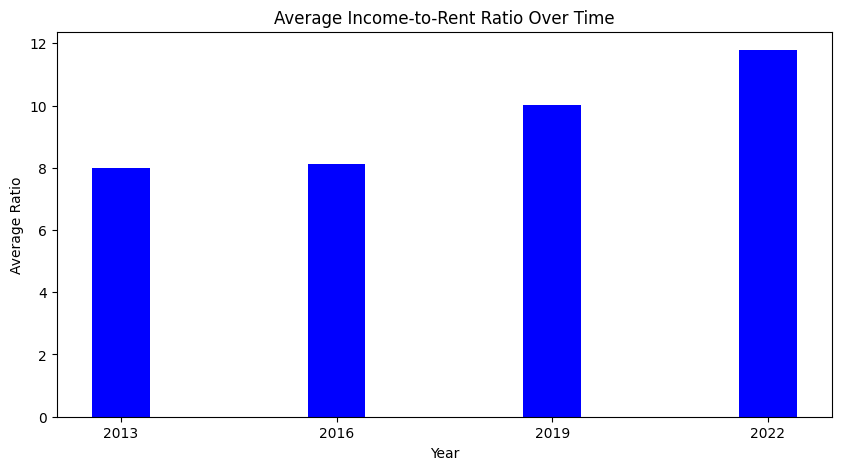

In [58]:
import matplotlib.pyplot as plt

combined_data_2013['Year'] = 2013
combined_data_2016['Year'] = 2016
combined_data_2019['Year'] = 2019
combined_data_2022['Year'] = 2022

all_data = pd.concat([combined_data_2013, combined_data_2016, combined_data_2019, combined_data_2022])

average_ratios = all_data.groupby('Year')['Income to Rent Ratio'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(average_ratios['Year'], average_ratios['Income to Rent Ratio'], color='blue')
plt.title('Average Income-to-Rent Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Average Ratio')
plt.xticks(average_ratios['Year'])  # Ensure all years are displayed
plt.show()

The bar chart is a very simplistic way of seeing that over the span of 2013 to 2022, the average income to rent ratio has been increasing -- suggesting that income is growing faster than annual rent. While this suggests that affordability of apartments have improved (relative to resident's income), but this can also indicate that there has been an influx of higher-income residents coming into the Suffolk County in Massachussetts. Potential areas to look at for displacement:
- Demographic changes in these areas, along side with financial data based on demographic
- Create a mapping to show which census has a more severe increase in ratio, and which places have less

While the average of an income to rent ratio of the Suffolk County over a period of time is a good start, it doesn't tell us much. But it gives us a good direction on how we can expand these findings to tell us more about displacement in this area (whether or not it exists or not based on income/rent/gentrification data).

### Top 30 Census Tracts with the Largest Percentage Change
As explained above, n see that the income to rent ratio has had a steady increase over time. Being able to break this down into smaller components would allow us to see things better in detail. The section below does exactly that, in which we kept the top 30 census tracts that has had the most drastic change from one year to another. 

There are 4 graphs below, each graph shows the percentage change from: 2013-2016, 2016-2019, 2019-2022 and 2013-2022. We were hoping that being able to see these changes and which census tracks show up once, or multiple times would give us more valuable information.

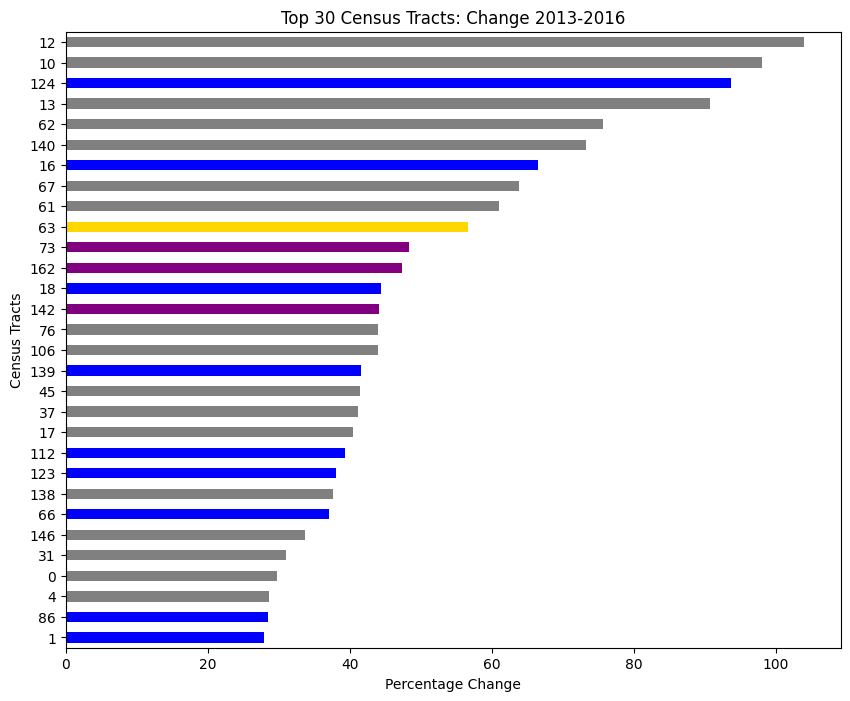

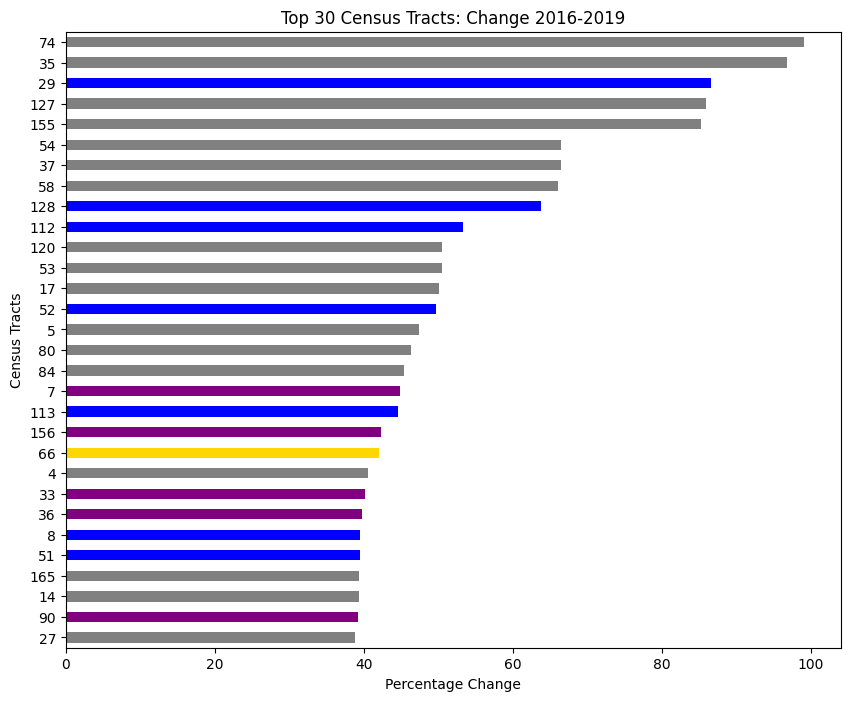

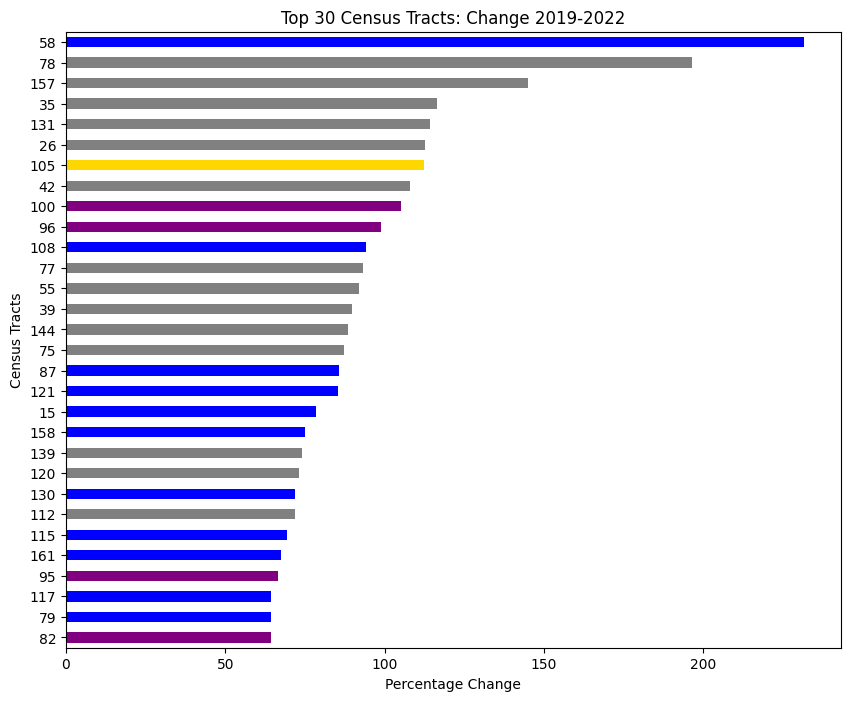

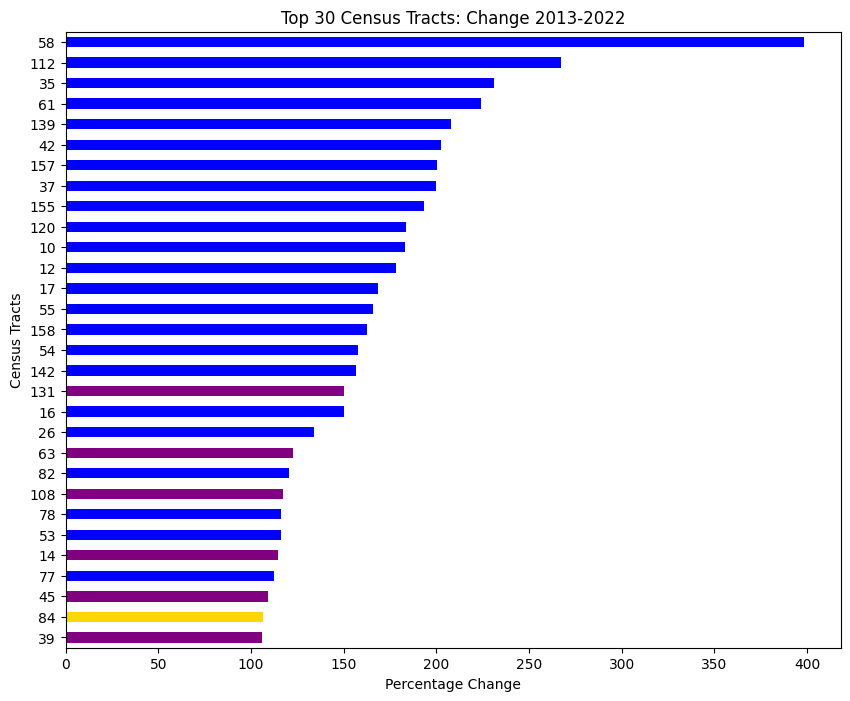

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_heatmap is your DataFrame from previous steps
# Sorting and selecting the top 30 for each period

def calculate_percentage_change(df, start_year, end_year, column_name='Income to Rent Ratio'):
    start_df = df[df['Year'] == start_year].set_index('GEO_ID')[column_name]
    end_df = df[df['Year'] == end_year].set_index('GEO_ID')[column_name]
    # Ensure no division by zero
    change = (end_df - start_df) / start_df.where(start_df != 0) * 100
    return change.dropna()  # Drop any NaN results from division or missing data

# Assuming 'all_data' is your concatenated DataFrame with a 'Year' column
change_2013_2016 = calculate_percentage_change(all_data, 2013, 2016)
change_2016_2019 = calculate_percentage_change(all_data, 2016, 2019)
change_2019_2022 = calculate_percentage_change(all_data, 2019, 2022)
change_2013_2022 = calculate_percentage_change(all_data, 2013, 2022)

data_for_heatmap = {
    'GEO_ID': [],
    'Change 2013-2016': [],
    'Change 2016-2019': [],
    'Change 2019-2022': [],
    'Change 2013-2022': []
}

for change, label in zip([change_2013_2016, change_2016_2019, change_2019_2022, change_2013_2022], 
                         ['Change 2013-2016', 'Change 2016-2019', 'Change 2019-2022', 'Change 2013-2022']):
    for geo_id, value in change.items():
        if geo_id not in data_for_heatmap['GEO_ID']:
            data_for_heatmap['GEO_ID'].append(geo_id)
            for k in data_for_heatmap:
                if k != 'GEO_ID':
                    data_for_heatmap[k].append(None)
        index = data_for_heatmap['GEO_ID'].index(geo_id)
        data_for_heatmap[label][index] = value

df_heatmap = pd.DataFrame(data_for_heatmap)
df_heatmap['GEO_ID'] = df_heatmap['GEO_ID'].astype(str)


def plot_individual_bar_chart(data, title, column):
    plt.figure(figsize=(10, 8))  # Set the size of the figure
    data = data.sort_values(by=column, ascending=True)  # Sort data for a better visual
    data[column].plot(kind='barh', color='skyblue')  # Create a horizontal bar chart
    plt.title(title)
    plt.xlabel('Percentage Change')
    plt.ylabel('Census Tracts')
    plt.show()  # Show the plot

# Assuming df_heatmap is your DataFrame from previous ste


# Sorting and selecting the top 30 for each period
top_tracts_2013_2016 = df_heatmap.sort_values(by='Change 2013-2016', ascending=False).head(30)
top_tracts_2016_2019 = df_heatmap.sort_values(by='Change 2016-2019', ascending=False).head(30)
top_tracts_2019_2022 = df_heatmap.sort_values(by='Change 2019-2022', ascending=False).head(30)
top_tracts_2013_2022 = df_heatmap.sort_values(by='Change 2013-2022', ascending=False).head(30)

tracts_list = [
    top_tracts_2013_2016.index.tolist(),
    top_tracts_2016_2019.index.tolist(),
    top_tracts_2019_2022.index.tolist(),
    top_tracts_2013_2022.index.tolist()
]

# Flatten the list and count occurrences
all_tracts = [tract for sublist in tracts_list for tract in sublist]
tract_counts = pd.Series(all_tracts).value_counts()

# Determine frequency of appearance
tract_frequency = tract_counts.to_frame(name='Frequency')

def assign_color(frequency):
    if frequency == 4:
        return 'gold'  # Appears in all four charts
    elif frequency == 3:
        return 'purple'  # Appears in three charts
    elif frequency == 2:
        return 'blue'  # Appears in two charts
    else:
        return 'grey'  # Appears in one chart

tract_frequency['Color'] = tract_frequency['Frequency'].apply(assign_color)

def plot_colored_bar_chart(data, title, column):
    plt.figure(figsize=(10, 8))
    colors = [tract_frequency.loc[tract, 'Color'] if tract in tract_frequency.index else 'grey' for tract in data.index]
    data[column].sort_values().plot(kind='barh', color=colors)
    plt.title(title)
    plt.xlabel('Percentage Change')
    plt.ylabel('Census Tracts')
    plt.show()


plot_colored_bar_chart(top_tracts_2013_2016, 'Top 30 Census Tracts: Change 2013-2016', 'Change 2013-2016')
plot_colored_bar_chart(top_tracts_2016_2019, 'Top 30 Census Tracts: Change 2016-2019', 'Change 2016-2019')
plot_colored_bar_chart(top_tracts_2019_2022, 'Top 30 Census Tracts: Change 2019-2022', 'Change 2019-2022')
plot_colored_bar_chart(top_tracts_2013_2022, 'Top 30 Census Tracts: Change 2013-2022', 'Change 2013-2022')

The bars in gold means it has shown up on all four graphs. The bars in purple means it has shown up on three graphs. The bars in blue means it has shown up on two graphs. The bars in grey means it has only shown up in one of the graphs. \
Given these graphs, we can see which census tracts has shown a large change in income to rent ratio. We can see which year period it occured in, and with this information, we can look into these census tracts that can justify the rankings of these percentage changes (rent decrease, influx of high income residents, etc). This gives us more information of which area to look at, as a better future measure of gentrification and how it might indicate displacement (people leaving that area, etc).

### Means of Transportation vs. Income ###

In this section, I will be looking into income of households in different census tracts against data about transportation methods to work by residents of these census tracts. The data for transportation methods is quite complex, so I will start with something broad by looking at the percentage of people that choose a specific category of transit (private vehicle, train, subway, et cetera).

In [60]:
transportation_2013_path = '../transport_data/transportation-2013.csv'
transportation_2016_path = '../transport_data/transportation-2016.csv'
transportation_2019_path = '../transport_data/transportation-2019.csv'
transportation_2022_path = '../transport_data/transportation-2022.csv'

transportation_2013 = pd.read_csv(transportation_2013_path)
transportation_2016 = pd.read_csv(transportation_2016_path)
transportation_2019 = pd.read_csv(transportation_2019_path)
transportation_2022 = pd.read_csv(transportation_2022_path)

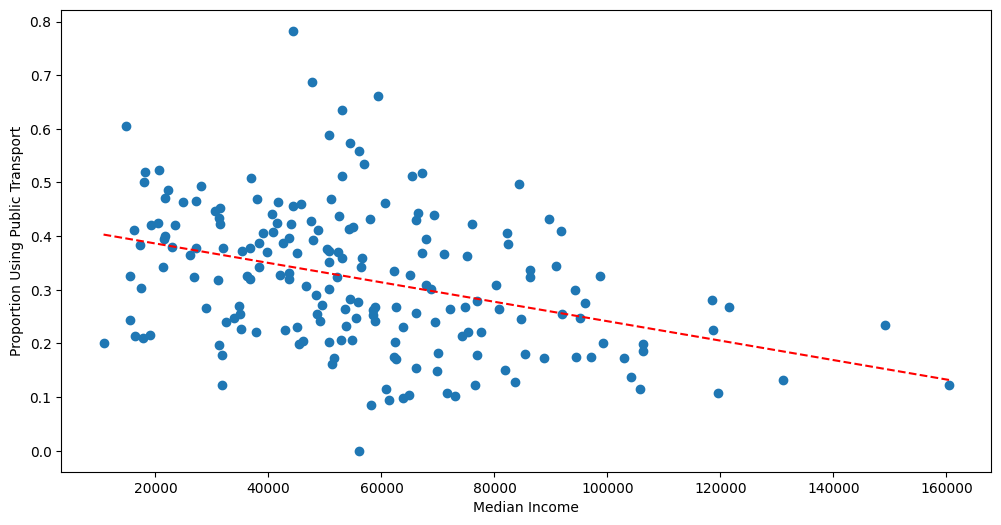

Text(0, 0.5, 'Proportion that are Carpooling')

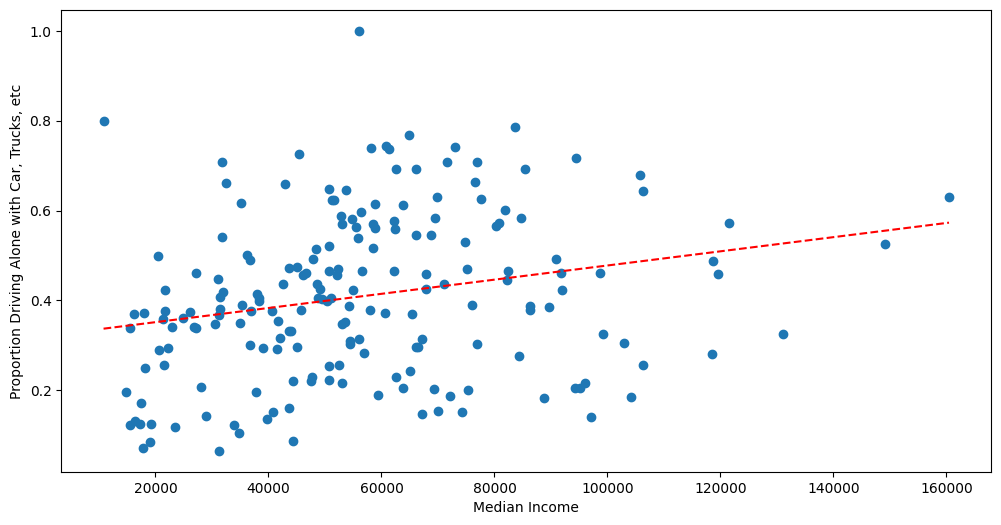

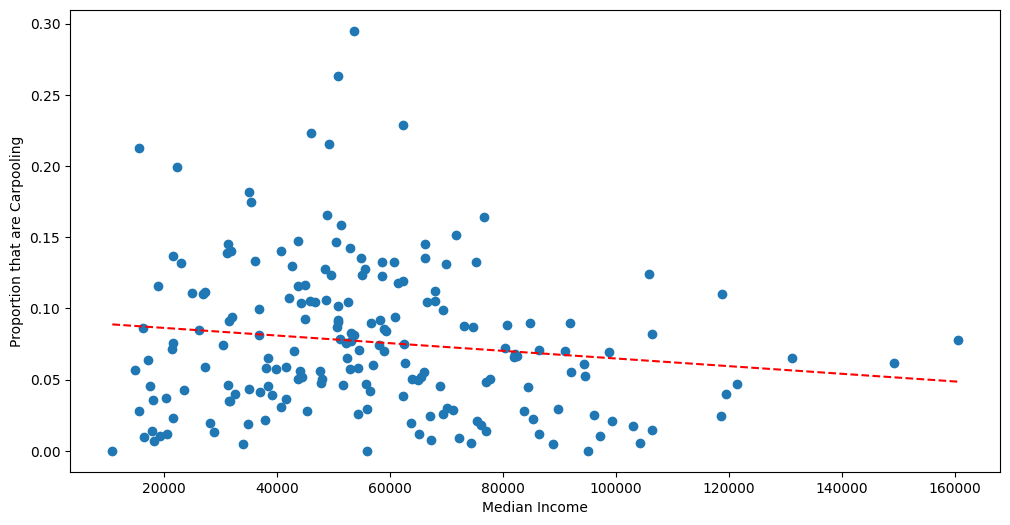

In [61]:
transportation_2013 = transportation_2013.iloc[1:]
transportation_2013 = transportation_2013.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2013[col] = pd.to_numeric(transportation_2013[col], errors='coerce')
    
transportation_2013 = transportation_2013.dropna(axis=1, how='all')

transportation_2013['Public_Transport_Ratio'] = transportation_2013['S0802_C04_001E'] / transportation_2013['S0802_C01_001E']
transportation_2013['Drive_Alone_Ratio'] = transportation_2013['S0802_C02_001E'] / transportation_2013['S0802_C01_001E']
transportation_2013['Carpool_Ratio'] = transportation_2013['S0802_C03_001E'] / transportation_2013['S0802_C01_001E']

trans_inc_merged_2013 = pd.merge(transportation_2013, income_data_2013, on='GEO_ID')

trans_inc_merged_2013.rename(columns={
    'S1901_C01_012E': 'Median Household Income'
}, inplace=True)

trans_inc_merged_2013 = trans_inc_merged_2013.drop(trans_inc_merged_2013.index[0])
trans_inc_merged_2013['Median Household Income'] = trans_inc_merged_2013['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2013['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2013[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2013['Median Household Income'] = pd.to_numeric(trans_inc_merged_2013['Median Household Income'], errors='coerce')
trans_inc_merged_2013['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2013['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2013['Median Household Income'], trans_inc_merged_2013['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data = trans_inc_merged_2013.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data['Median Household Income']
y = cleaned_data['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data['Median Household Income']
y = cleaned_data['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2013['Median Household Income'], trans_inc_merged_2013['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data['Median Household Income']
y = cleaned_data['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2013['Median Household Income'], trans_inc_merged_2013['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')




The section above shows the median income of households per census tract put against means of transportation per census tract in 2013. Using the means of transportation data, I used a ratio of the people who chose the type of transportation, against the total number of people who answered the survey in that area. Using a ratio makes more sense as it would scale the numbers, and even out the playing field - thus census tracts with a larger sample size wouldn't have a stronger influence on the trend and data.

As observed, there is a positive correlation between income and choosing to drive alone to work, whereas carpooling and public transport has a negative correlation. This makes sense as driving alone or owning a private vehicle typically come with higher expenses that higher income households are more comfortable with expending. With that being said, the sections below will conduct the same correlation analysis for 2016, 2019, and 2022. It is expected that all years follow a similar trend. However, in showing this correlation, we can say that there is some relationship and we can delve deeper into looking at the different relationships that occur within census tracts as a way to point out potential displacement that is occuring.

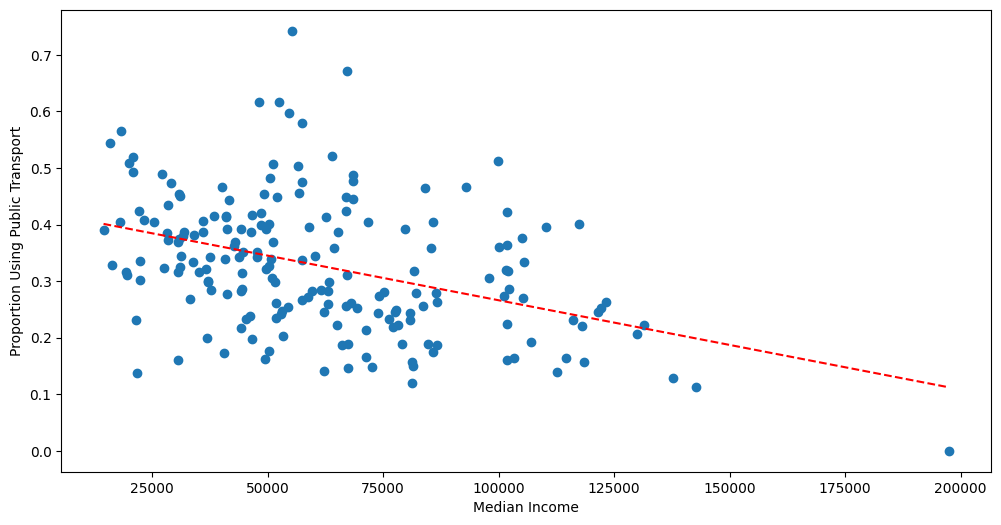

Text(0, 0.5, 'Proportion that are Carpooling')

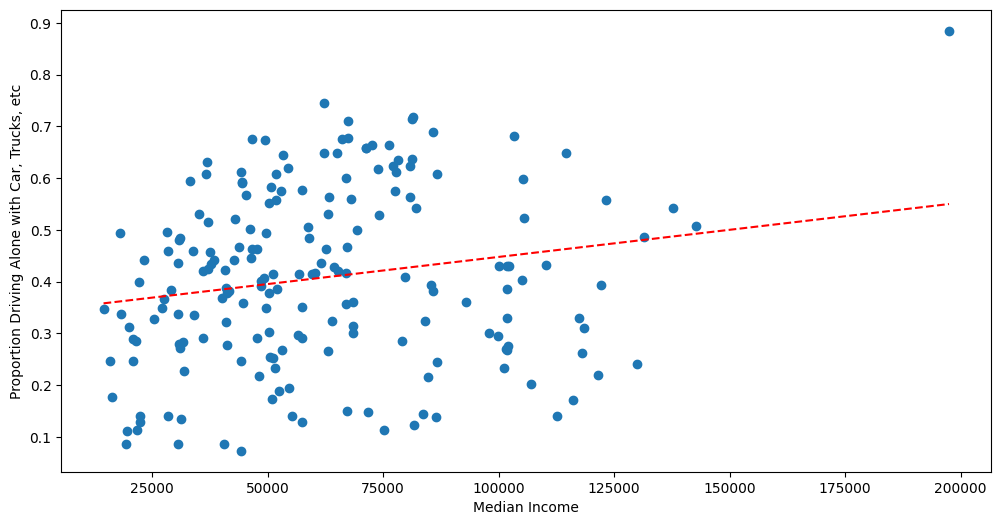

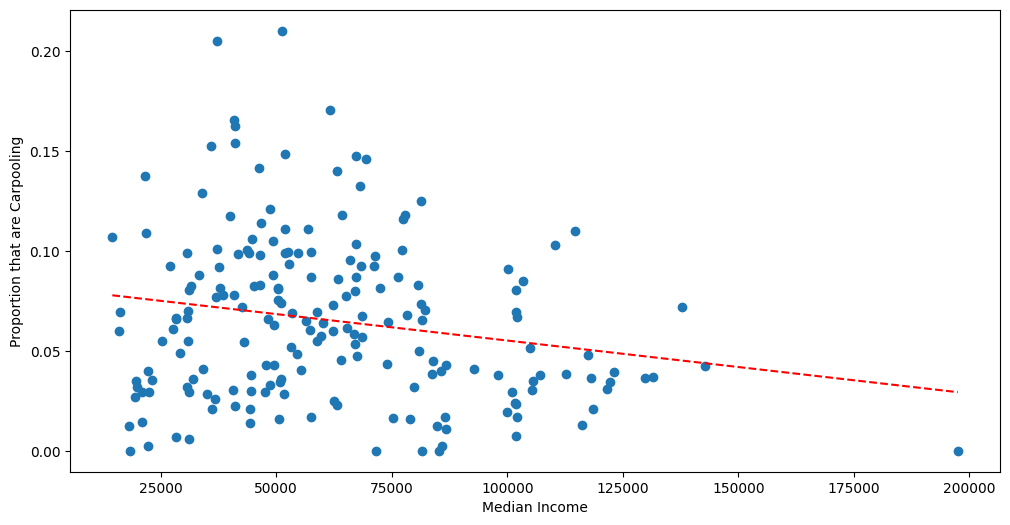

In [62]:
transportation_2016 = transportation_2016.iloc[1:]
transportation_2016 = transportation_2016.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2016[col] = pd.to_numeric(transportation_2016[col], errors='coerce')
    
transportation_2016 = transportation_2016.dropna(axis=1, how='all')

transportation_2016['Public_Transport_Ratio'] = transportation_2016['S0802_C04_001E'] / transportation_2016['S0802_C01_001E']
transportation_2016['Drive_Alone_Ratio'] = transportation_2016['S0802_C02_001E'] / transportation_2016['S0802_C01_001E']
transportation_2016['Carpool_Ratio'] = transportation_2016['S0802_C03_001E'] / transportation_2016['S0802_C01_001E']

trans_inc_merged_2016 = pd.merge(transportation_2016, income_data_2016, on='GEO_ID')

trans_inc_merged_2016.rename(columns={
    'S1901_C01_012E': 'Median Household Income'
}, inplace=True)

trans_inc_merged_2016 = trans_inc_merged_2016.drop(trans_inc_merged_2016.index[0])
trans_inc_merged_2016['Median Household Income'] = trans_inc_merged_2016['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2016['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2016[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2016['Median Household Income'] = pd.to_numeric(trans_inc_merged_2016['Median Household Income'], errors='coerce')
trans_inc_merged_2016['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2016['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2016['Median Household Income'], trans_inc_merged_2016['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data_2016 = trans_inc_merged_2016.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data_2016['Median Household Income']
y = cleaned_data_2016['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data_2016['Median Household Income']
y = cleaned_data_2016['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2016['Median Household Income'], trans_inc_merged_2016['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data_2016['Median Household Income']
y = cleaned_data_2016['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2016['Median Household Income'], trans_inc_merged_2016['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')

The data above is for 2016. There is one clear outlier at the incredibly high median income. This likely means that not many people surveyed.

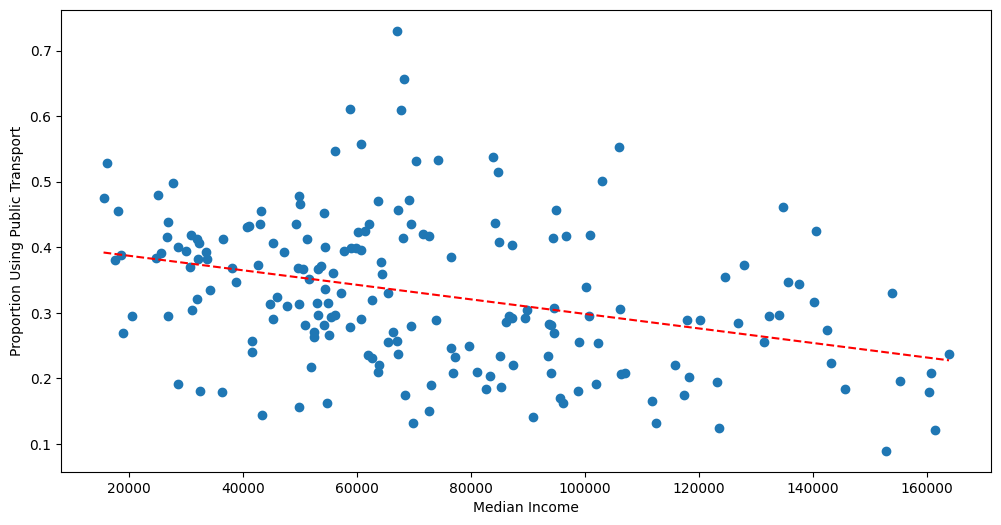

Text(0, 0.5, 'Proportion that are Carpooling')

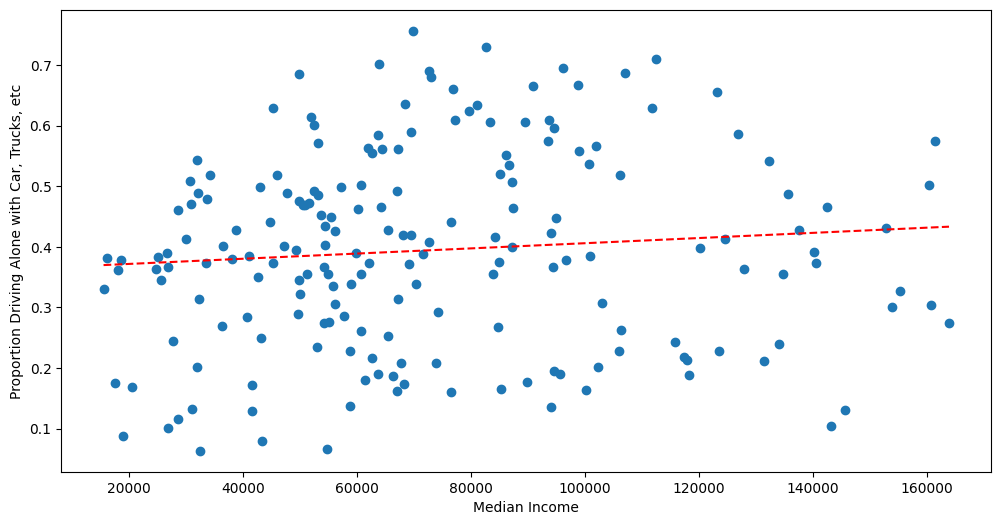

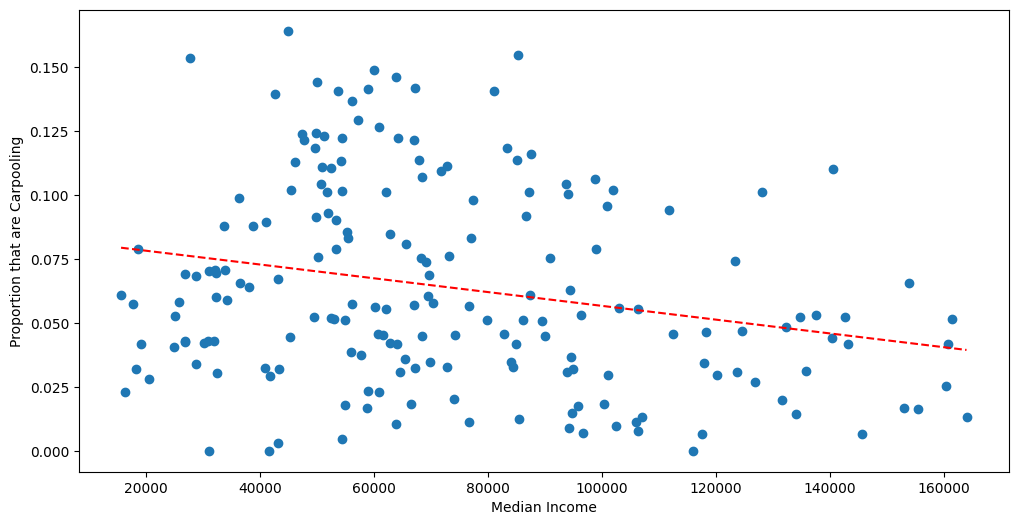

In [63]:
transportation_2019 = transportation_2019.iloc[1:]
transportation_2019 = transportation_2019.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2019[col] = pd.to_numeric(transportation_2019[col], errors='coerce')
    
transportation_2019 = transportation_2019.dropna(axis=1, how='all')

transportation_2019['Public_Transport_Ratio'] = transportation_2019['S0802_C04_001E'] / transportation_2019['S0802_C01_001E']
transportation_2019['Drive_Alone_Ratio'] = transportation_2019['S0802_C02_001E'] / transportation_2019['S0802_C01_001E']
transportation_2019['Carpool_Ratio'] = transportation_2019['S0802_C03_001E'] / transportation_2019['S0802_C01_001E']

trans_inc_merged_2019 = pd.merge(transportation_2019, income_data_2019, on='GEO_ID')

trans_inc_merged_2019.rename(columns={
    'S1901_C01_012E': 'Median Household Income'
}, inplace=True)

trans_inc_merged_2019 = trans_inc_merged_2019.drop(trans_inc_merged_2019.index[0])
trans_inc_merged_2019['Median Household Income'] = trans_inc_merged_2019['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2019['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2019[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2019['Median Household Income'] = pd.to_numeric(trans_inc_merged_2019['Median Household Income'], errors='coerce')
trans_inc_merged_2019['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2019['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data_2019 = trans_inc_merged_2019.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')

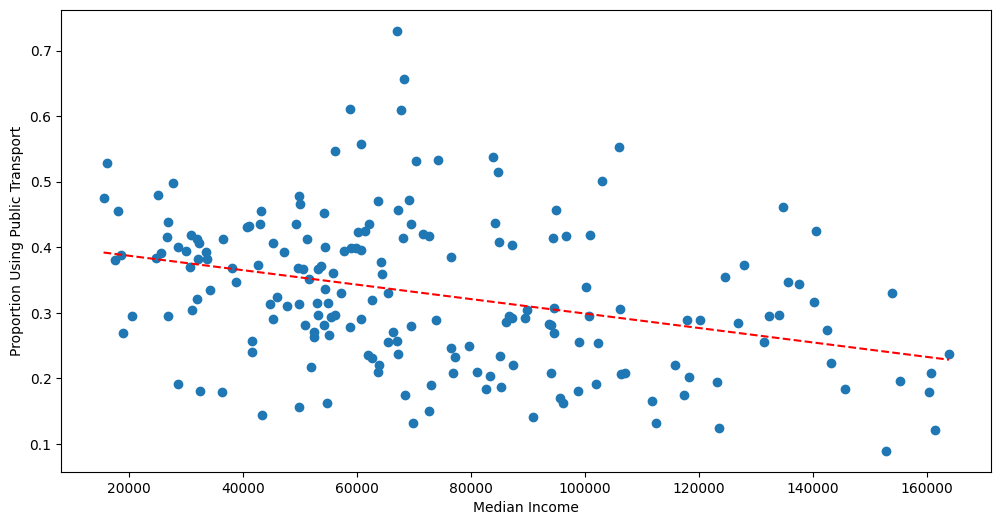

Text(0, 0.5, 'Proportion that are Carpooling')

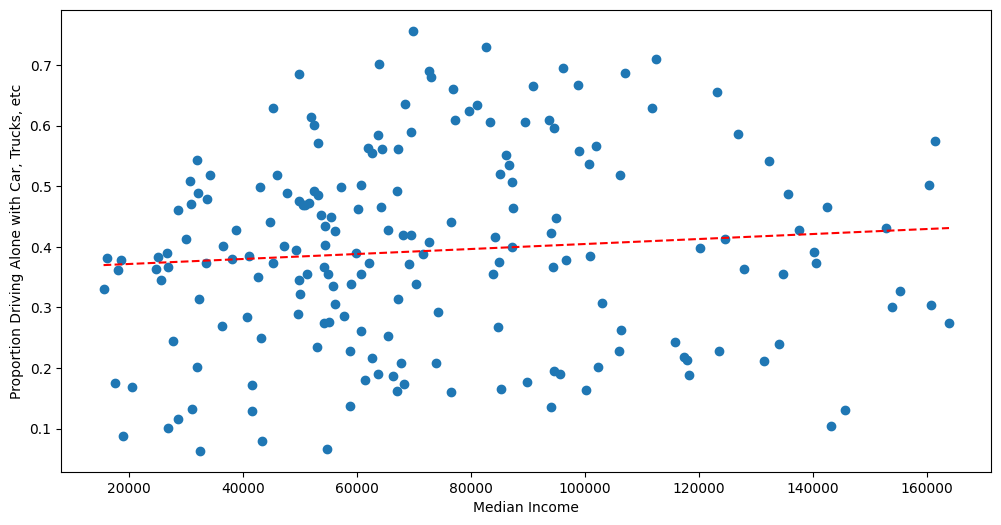

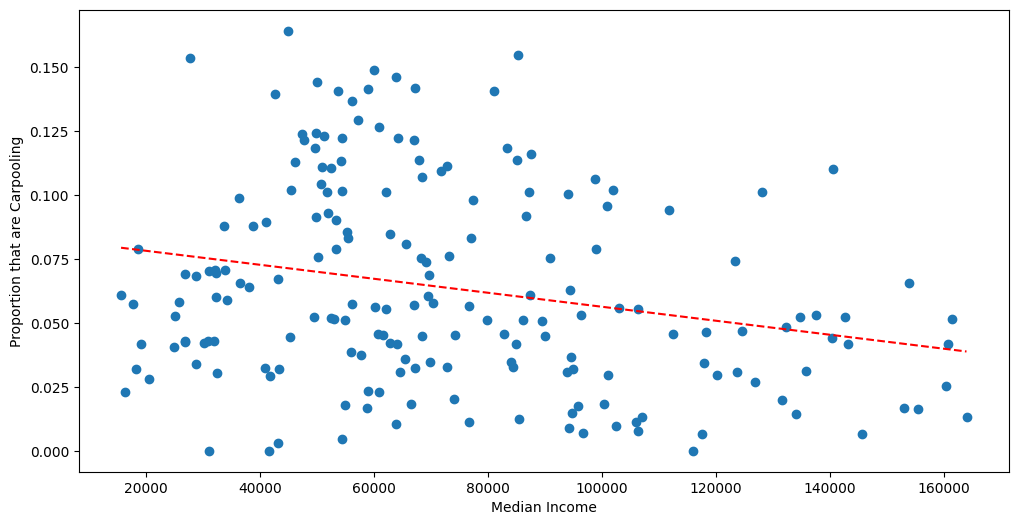

In [64]:
transportation_2019 = transportation_2019.iloc[1:]
transportation_2019 = transportation_2019.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2019[col] = pd.to_numeric(transportation_2019[col], errors='coerce')
    
transportation_2019 = transportation_2019.dropna(axis=1, how='all')

transportation_2019['Public_Transport_Ratio'] = transportation_2019['S0802_C04_001E'] / transportation_2019['S0802_C01_001E']
transportation_2019['Drive_Alone_Ratio'] = transportation_2019['S0802_C02_001E'] / transportation_2019['S0802_C01_001E']
transportation_2019['Carpool_Ratio'] = transportation_2019['S0802_C03_001E'] / transportation_2019['S0802_C01_001E']

trans_inc_merged_2019 = pd.merge(transportation_2019, income_data_2019, on='GEO_ID')

trans_inc_merged_2019.rename(columns={
    'S1901_C01_012E': 'Median Household Income'
}, inplace=True)

trans_inc_merged_2019 = trans_inc_merged_2019.drop(trans_inc_merged_2019.index[0])
trans_inc_merged_2019['Median Household Income'] = trans_inc_merged_2019['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2019['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2019[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2019['Median Household Income'] = pd.to_numeric(trans_inc_merged_2019['Median Household Income'], errors='coerce')
trans_inc_merged_2019['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2019['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data_2019 = trans_inc_merged_2019.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')

Index(['GEO_ID', 'NAME_x', 'S0802_C01_001E', 'S0802_C01_001M',
       'S0802_C01_002E', 'S0802_C01_002M', 'S0802_C01_003E', 'S0802_C01_003M',
       'S0802_C01_004E', 'S0802_C01_004M',
       ...
       'S1901_C04_012M', 'S1901_C04_013E', 'S1901_C04_013M', 'S1901_C04_014E',
       'S1901_C04_014M', 'S1901_C04_015E', 'S1901_C04_015M', 'S1901_C04_016E',
       'S1901_C04_016M', 'Unnamed: 130'],
      dtype='object', length=915)


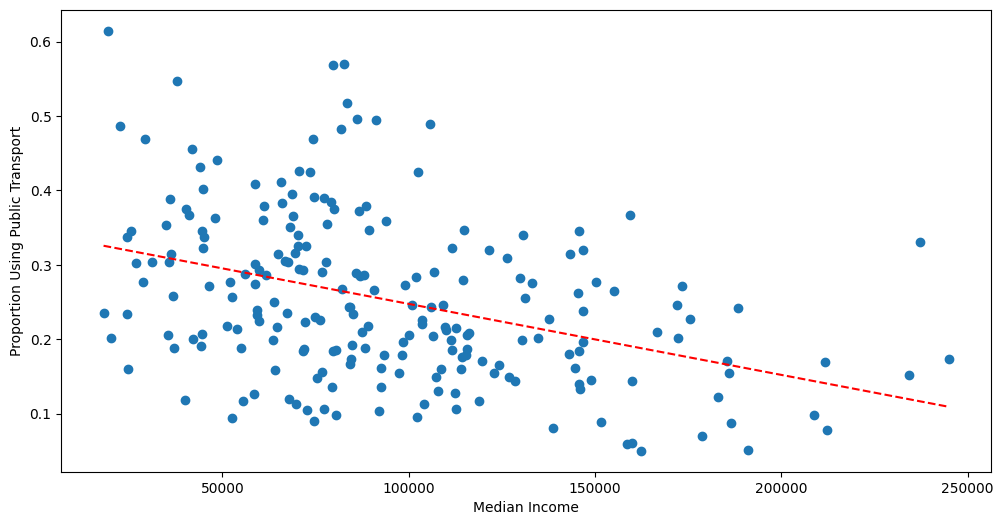

Text(0, 0.5, 'Proportion that are Carpooling')

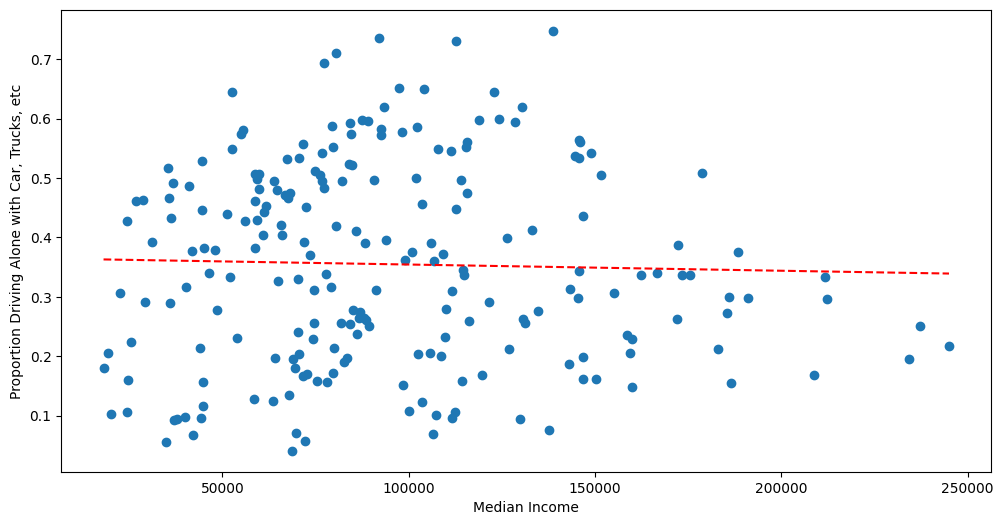

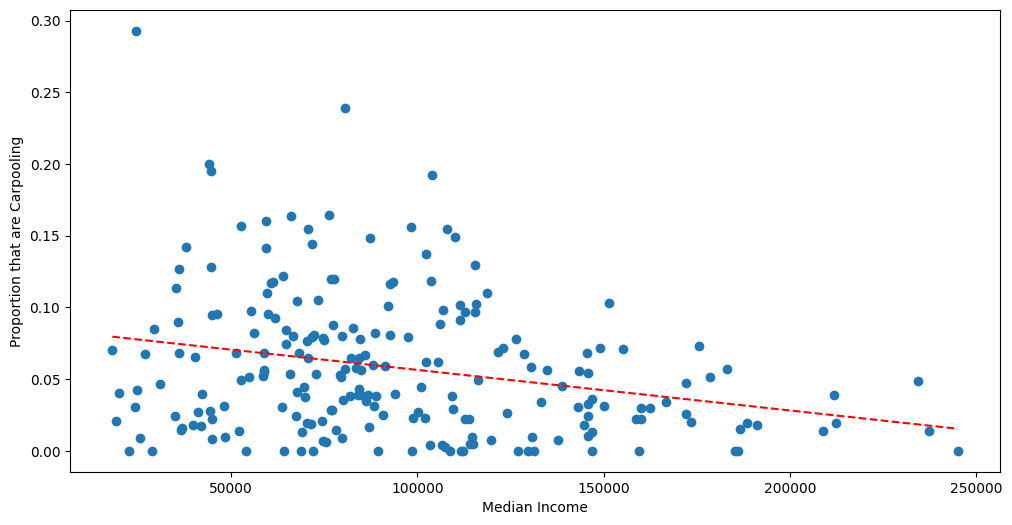

In [65]:
transportation_2022 = transportation_2022.iloc[1:]
transportation_2022 = transportation_2022.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2022[col] = pd.to_numeric(transportation_2022[col], errors='coerce')
    
transportation_2022 = transportation_2022.dropna(axis=1, how='all')

transportation_2022['Public_Transport_Ratio'] = transportation_2022['S0802_C04_001E'] / transportation_2022['S0802_C01_001E']
transportation_2022['Drive_Alone_Ratio'] = transportation_2022['S0802_C02_001E'] / transportation_2022['S0802_C01_001E']
transportation_2022['Carpool_Ratio'] = transportation_2022['S0802_C03_001E'] / transportation_2022['S0802_C01_001E']

trans_inc_merged_2022 = pd.merge(transportation_2022, income_data_2022, on='GEO_ID')

# columns_to_keep = ['GEO_ID', 'Drive_Alone_Ratio', 'Carpool_Ratio', 'Public_Transport_Ratio', 'S1901_C01_012E']
# trans_inc_merged_2022 = trans_inc_merged_2022[columns_to_keep]


trans_inc_merged_2022.rename(columns={
    'S1901_C01_012E': 'Median Household Income'
}, inplace=True)

print(trans_inc_merged_2022.columns)

trans_inc_merged_2022 = trans_inc_merged_2022.drop(trans_inc_merged_2022.index[0])
trans_inc_merged_2022['Median Household Income'] = trans_inc_merged_2022['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2022['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2022[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2022['Median Household Income'] = pd.to_numeric(trans_inc_merged_2022['Median Household Income'], errors='coerce')
trans_inc_merged_2022['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2022['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2022['Median Household Income'], trans_inc_merged_2022['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data_2022 = trans_inc_merged_2022.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data_2022['Median Household Income']
y = cleaned_data_2022['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data_2022['Median Household Income']
y = cleaned_data_2022['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2022['Median Household Income'], trans_inc_merged_2022['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data_2022['Median Household Income']
y = cleaned_data_2022['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2022['Median Household Income'], trans_inc_merged_2022['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')

#### Further Analysis: Delving Deeper into Census Tracts ####

Now that I have looked into the basic correlation of the three modes of transportation to median household income, it is time to look at the nuanced changes and shifts within census tracts. On top of that, we can also look at how the means of transportation shifts over the span of 9 years (from 2013 to 2022). Depending on how it shifts, we can make hunches and assumptions on quality of public transportation, change in demographics, et cetera.

- Idea: pair this up with rent price shifts and property value shifting -- does an increase of means of public transportation of that area lead to a more drastic increase in property value
  - Perhaps gentrification of that area? More convenience means the area becomes more valuable -- thus maybe pair it up with income data and see if there is an influx of high income people coming in -- negative impacts of displacement (or perhaps, more convenient for low income individuals as it is clear that low income individuals would prefer public transit)

Below is an attempt at creating a heatmap using 2013 data with income to the ratios of the three different types of transportation. Since we have too many census tracts, I have created an interactive heatmap that is displayed onto your browser. However, there are still too many census tracts for this interactive heatmap. While you can scroll through and zoom in, it is hard to tell which census tracts has had relatively larger ratios for the respective transportation type. 

As a workaround to this issue, similarly to the income vs. rent, I will need to filter the census tracts. One way of doing this is by checking the variance in ratios, and only keeping the top several tracts that show the biggest shift in means of transportation over time, as these are the tracts with more things to look at.

MultiIndex([(         'Carpool_Ratio', 2013),
            (         'Carpool_Ratio', 2016),
            (         'Carpool_Ratio', 2019),
            (         'Carpool_Ratio', 2022),
            (     'Drive_Alone_Ratio', 2013),
            (     'Drive_Alone_Ratio', 2016),
            (     'Drive_Alone_Ratio', 2019),
            (     'Drive_Alone_Ratio', 2022),
            ('Public_Transport_Ratio', 2013),
            ('Public_Transport_Ratio', 2016),
            ('Public_Transport_Ratio', 2019),
            ('Public_Transport_Ratio', 2022)],
           names=[None, 'Year'])


/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_25406/2282358536.py:22: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



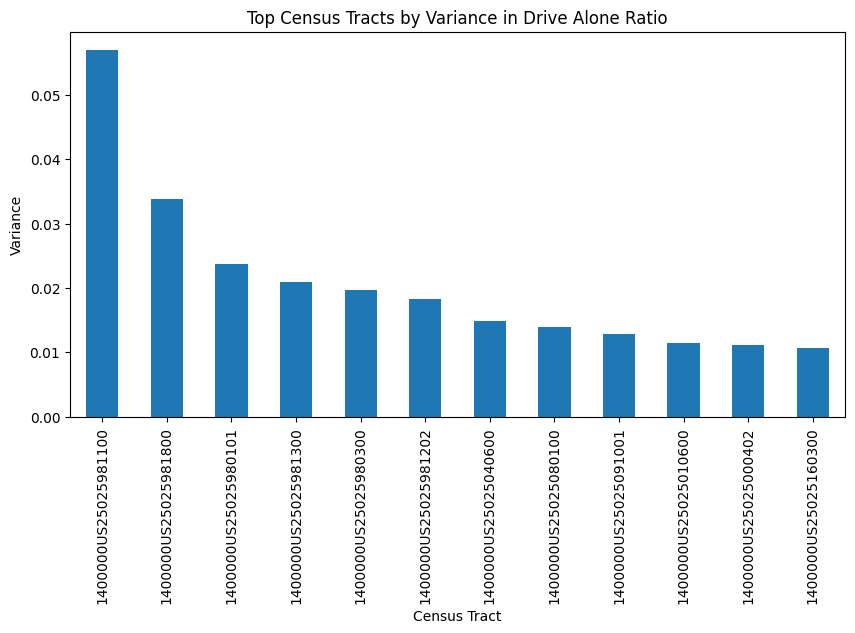

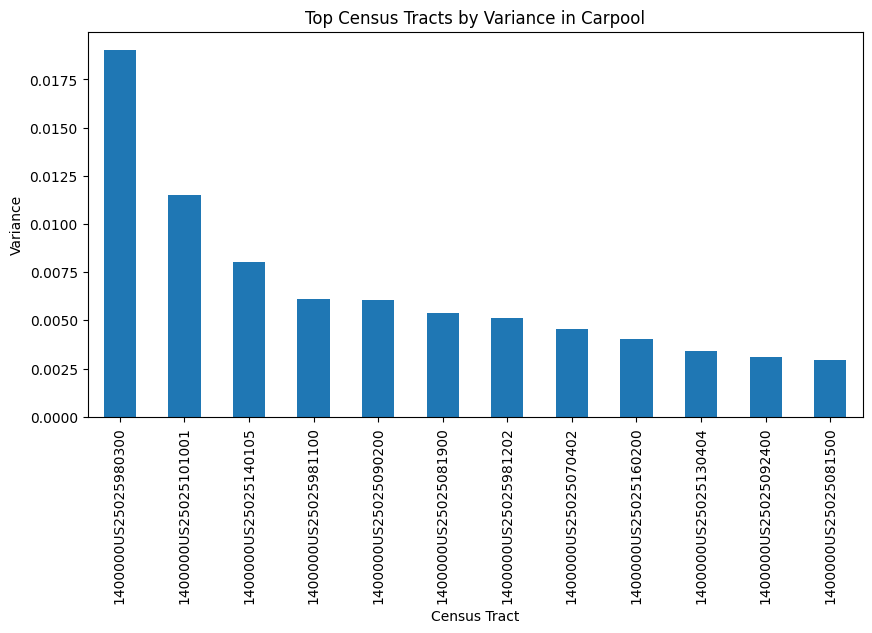

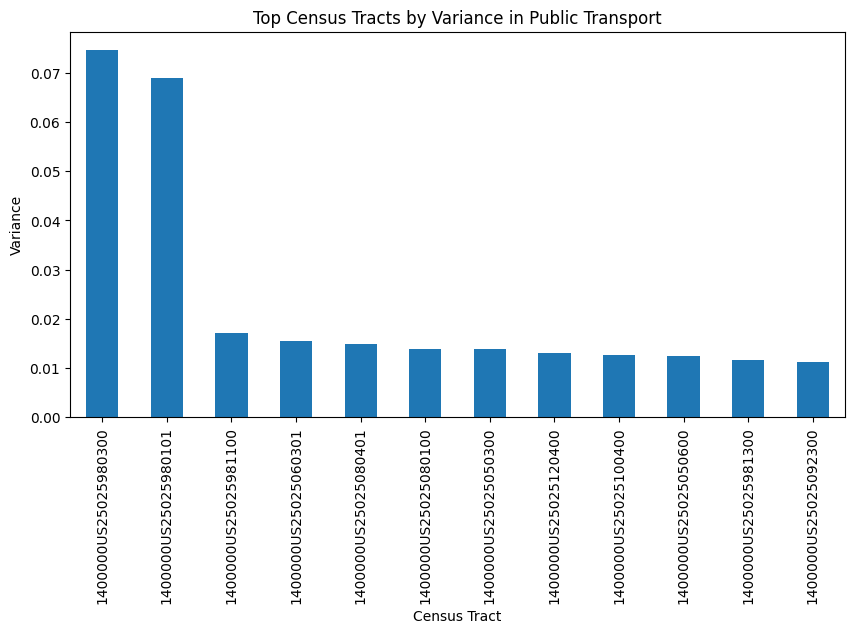

In [67]:
trans_inc_merged_2022['Year'] = 2022
trans_inc_merged_2019['Year'] = 2019
trans_inc_merged_2016['Year'] = 2016
trans_inc_merged_2013['Year'] = 2013

data_2022 = trans_inc_merged_2022[['GEO_ID', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio', 'Year']]
data_2019 = trans_inc_merged_2019[['GEO_ID', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio', 'Year']]
data_2016 = trans_inc_merged_2016[['GEO_ID', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio', 'Year']]
data_2013 = trans_inc_merged_2013[['GEO_ID', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio', 'Year']]

combined_data = pd.concat([data_2022, data_2019, data_2016, data_2013], axis=0)

pivot_data = combined_data.pivot_table(index='GEO_ID', columns='Year', values=['Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])


# variance_data = pivot_data.var(axis=1) 

# top_variance_public_transport = variance_data['Drive_Alone_Ratio'].nlargest(10)

print(pivot_data.columns)

variance_data = pivot_data.groupby(axis=1, level=0).var()

top_variance_drive_alone = variance_data['Drive_Alone_Ratio'].nlargest(12)
top_variance_carpool = variance_data['Carpool_Ratio'].nlargest(12)
top_variance_public_transport = variance_data['Public_Transport_Ratio'].nlargest(12)

# print("Top Variance in Drive Alone Ratio:")
# print(top_variance_drive_alone)
# print("\nTop Variance in Carpool Ratio:")
# print(top_variance_carpool)
# print("\nTop Variance in Public Transport Ratio:")
# print(top_variance_public_transport)

def plot_top_variance(variance_series, title):
    plt.figure(figsize=(10, 5))
    variance_series.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Census Tract')
    plt.ylabel('Variance')
    plt.show()

# Example usage
plot_top_variance(top_variance_drive_alone, 'Top Census Tracts by Variance in Drive Alone Ratio')
plot_top_variance(top_variance_carpool, 'Top Census Tracts by Variance in Carpool')
plot_top_variance(top_variance_public_transport, 'Top Census Tracts by Variance in Public Transport')

Above, we have shown the top 12 highest variance based on the mean of transportation category. This allows us to narrow down on which tracts to focus on. I can now combine all the census tracts together (could be more than 12 as some tracts can show up on one graph and not others) to generate a heatmap per year as a way to better visualize how the means of transportation has shifted. Did certain modes increase in preference? Which areas decreased?

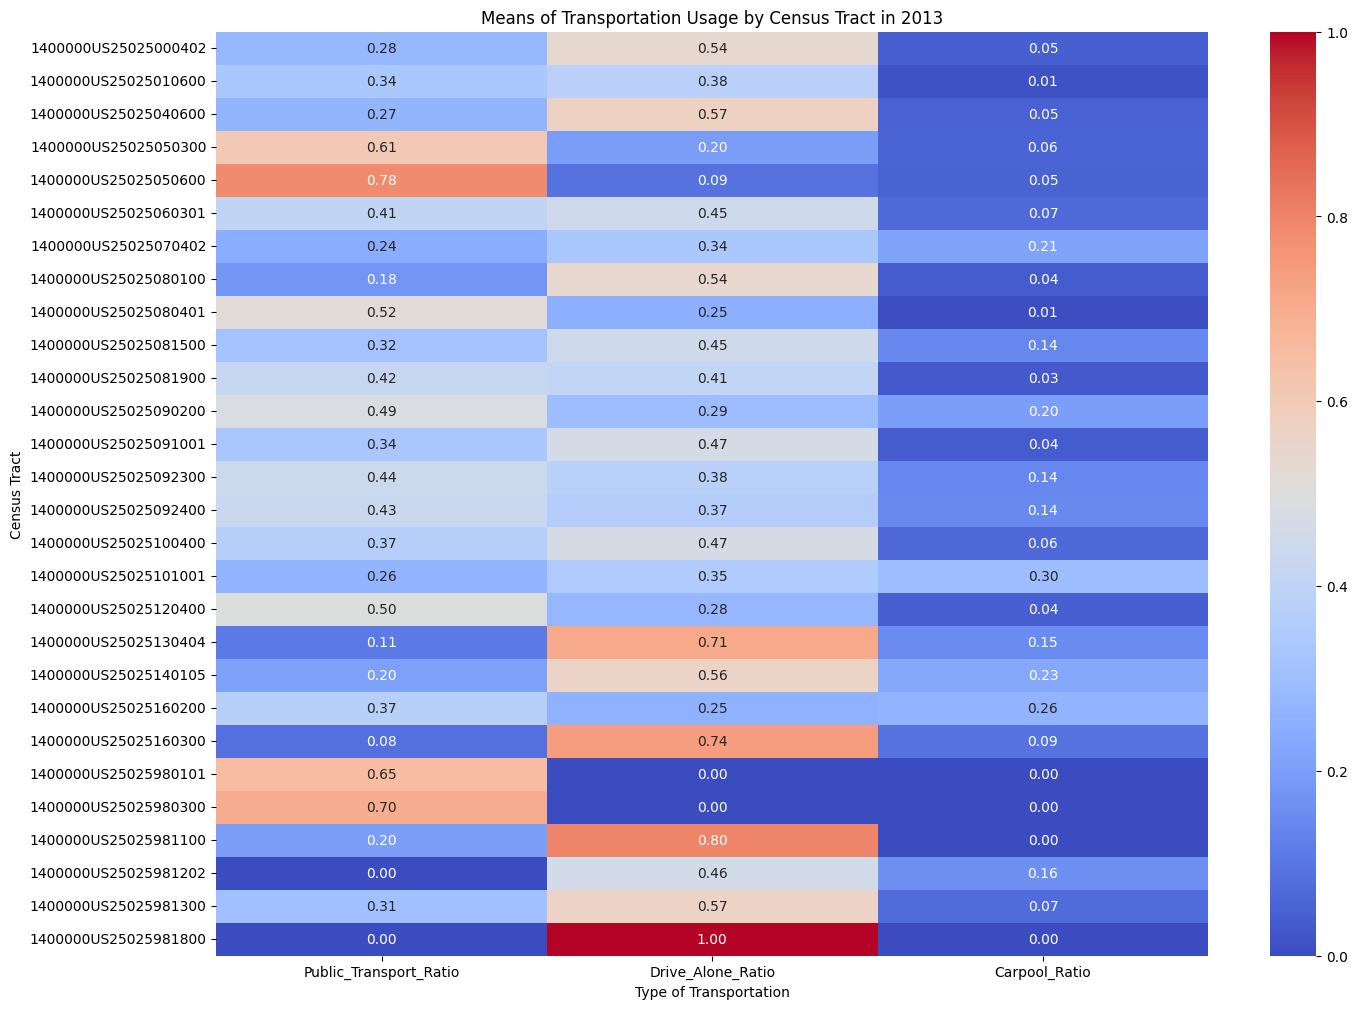

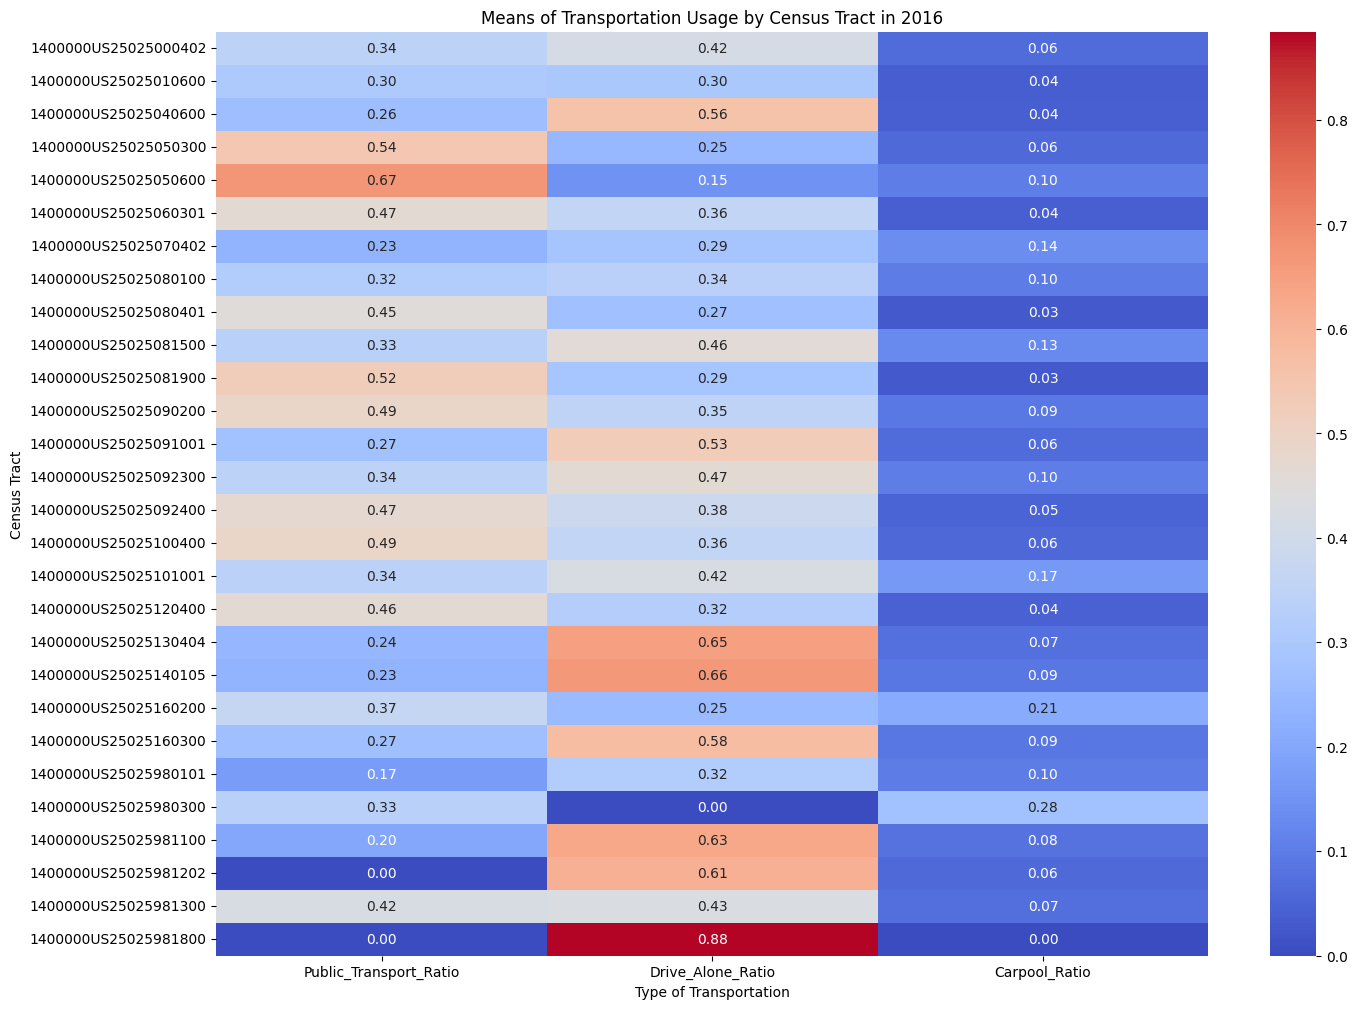

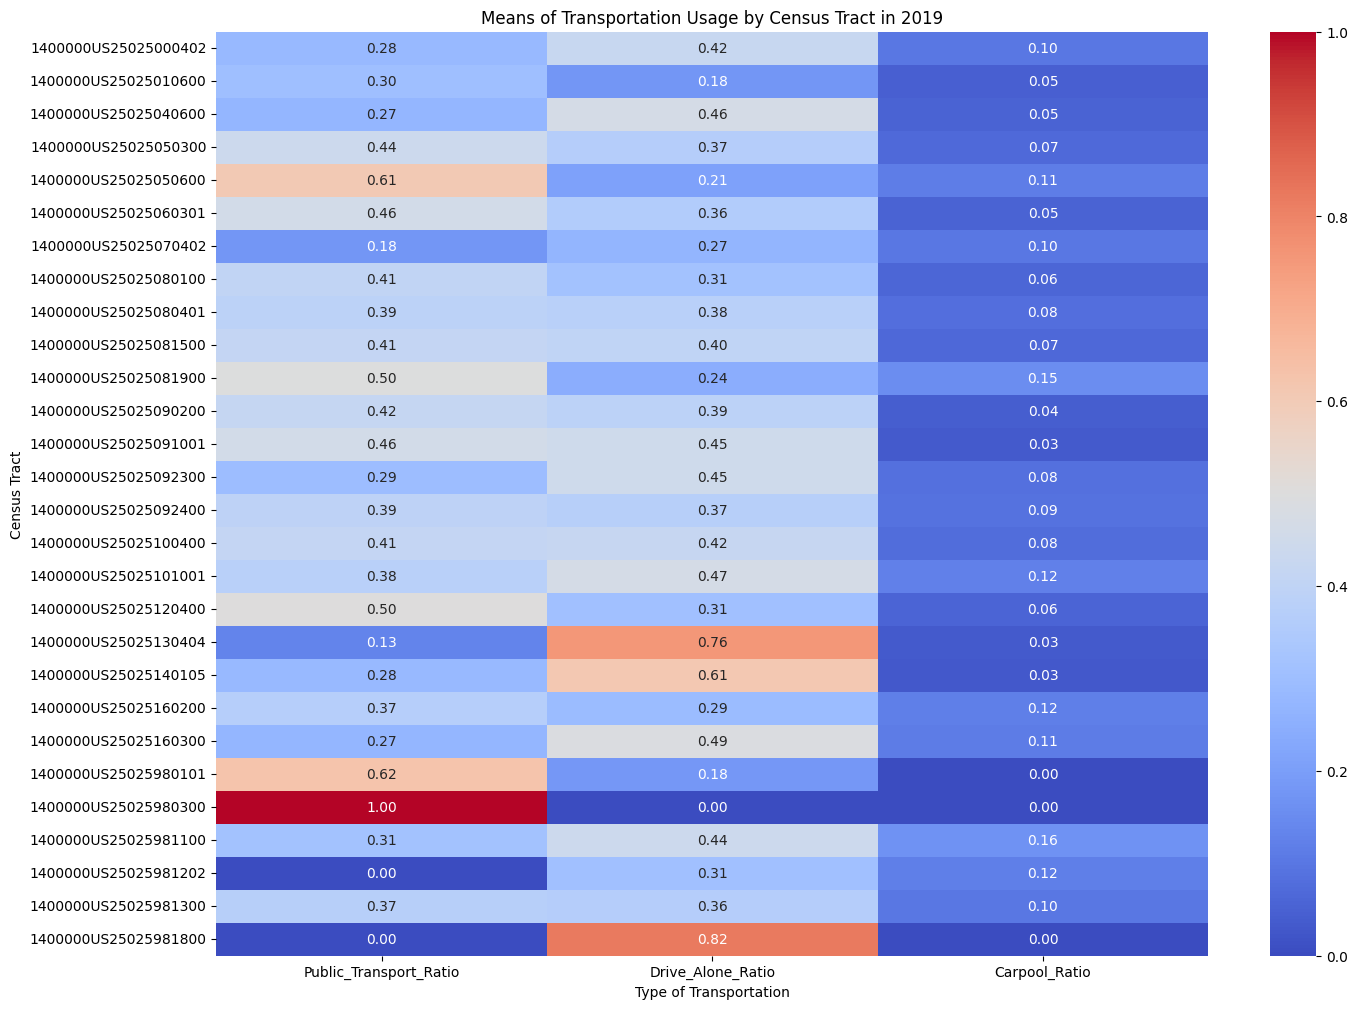

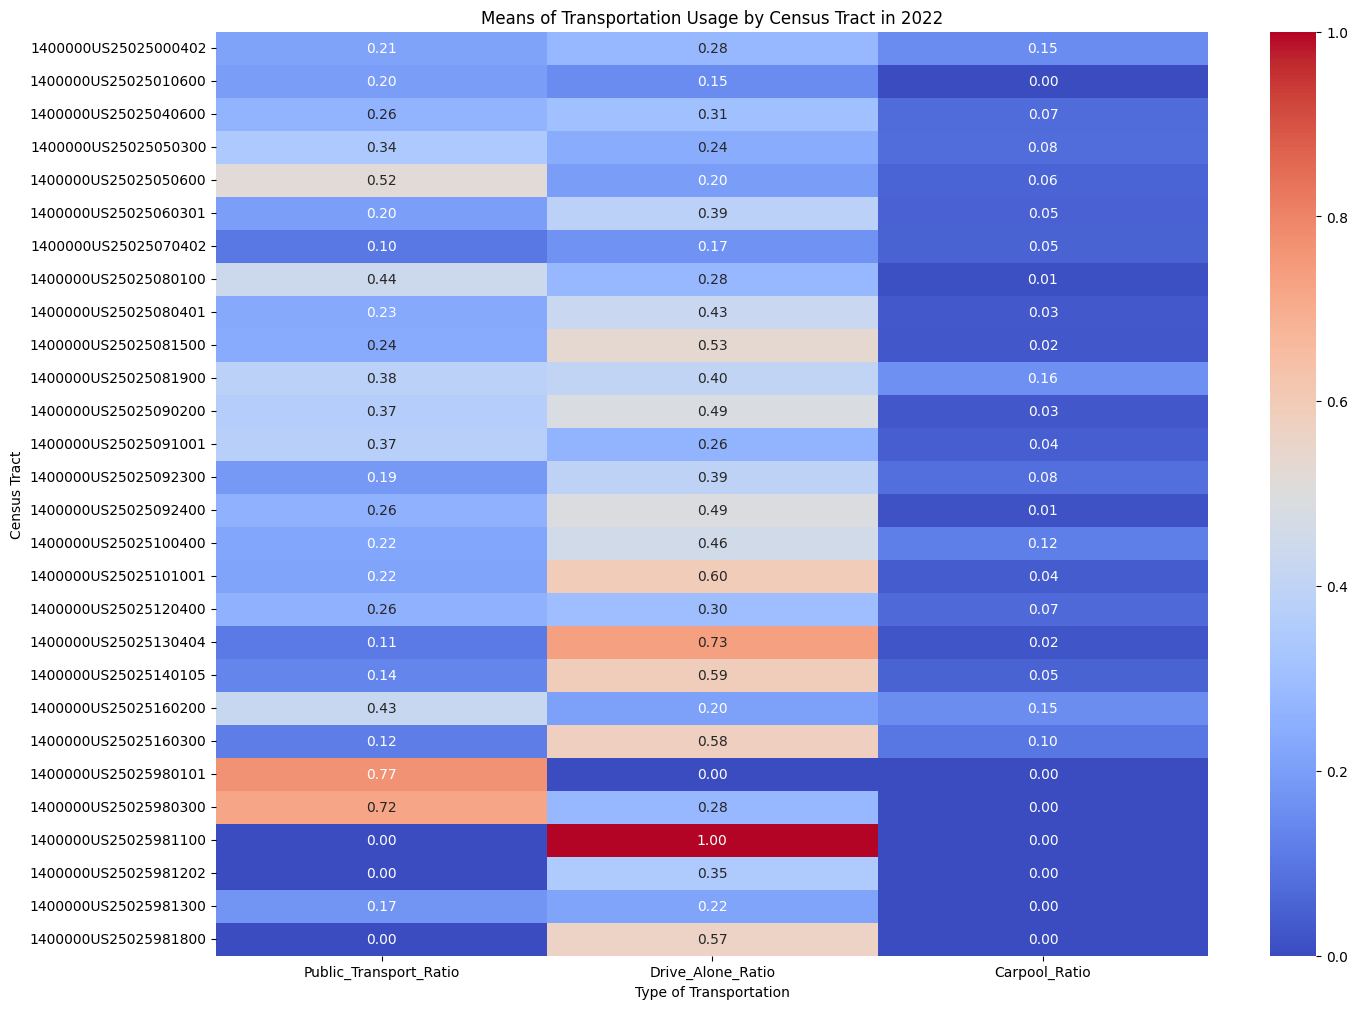

In [68]:
import seaborn as sns

unique_tracts = set(top_variance_drive_alone.index) | set(top_variance_carpool.index) | set(top_variance_public_transport.index)

unique_tracts_list = list(unique_tracts)

missing_in_2013 = {'1400000US25025000301', '1400000US25025010204', '1400000US25025000701'}

filtered_data_2013 = data_2013[data_2013['GEO_ID'].isin(unique_tracts_list)]
filtered_data_2016 = data_2016[data_2016['GEO_ID'].isin(unique_tracts_list)]
filtered_data_2019 = data_2019[data_2019['GEO_ID'].isin(unique_tracts_list)]
filtered_data_2022 = data_2022[data_2022['GEO_ID'].isin(unique_tracts_list)]

filtered_data_2013.set_index('GEO_ID', inplace=True)
filtered_data_2016.set_index('GEO_ID', inplace=True)
filtered_data_2019.set_index('GEO_ID', inplace=True)
filtered_data_2022.set_index('GEO_ID', inplace=True)

# Filter out the missing tracts from 2016, 2019, and 2022
filtered_data_2016 = filtered_data_2016[~filtered_data_2016.index.isin(missing_in_2013)]
filtered_data_2019 = filtered_data_2019[~filtered_data_2019.index.isin(missing_in_2013)]
filtered_data_2022 = filtered_data_2022[~filtered_data_2022.index.isin(missing_in_2013)]


filtered_data_2013.sort_index(inplace=True)
filtered_data_2016.sort_index(inplace=True)
filtered_data_2019.sort_index(inplace=True)
filtered_data_2022.sort_index(inplace=True)

def create_heatmap(data, year):
    plt.figure(figsize=(16, 12))  # Adjust size as needed
    sns.heatmap(data[['Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']], annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Means of Transportation Usage by Census Tract in {year}')
    plt.xlabel('Type of Transportation')
    plt.ylabel('Census Tract')
    plt.show()

# Create heatmaps for each year
create_heatmap(filtered_data_2013, 2013)
create_heatmap(filtered_data_2016, 2016)
create_heatmap(filtered_data_2019, 2019)
create_heatmap(filtered_data_2022, 2022)

Above are the heatmaps produced based on the census tracts with high variance on at least one of the transportation categories. This is just one example of a visualization that can point out a shift in ratio over time. Even if we take the first two tracts, we can see that there are relatively large shifts in ratios in people who travel by public transport to work, and people who drive alone in their vehicles to work. Another example is the third tract, specifically the public transport ratio. Over the span of 2013 to 2022, you can see that ratio decrease every three year interval. This indcates that fewer and fewer people are choosing to take public transport in this tract. The reason to this is unknown, but we can investigate this along with other additional and more specific data to see if there are any signs of displacement that is causing this (perhaps higher income individuals are entering, perhaps quality of public transport is decreasing, perhaps more low income individuals are forced to leave, which is displacement).

### Final: Further Exploration ###

Beyond this point, there has been quite a lot of data cleaning and analysis to generate correlations and heatmaps to help narrow down our search on census tracts in the Suffolk region that can help identify signs of displacement based on factors such as income, rent, property values, and means of transport. With these factors, we can look for evidence of gentrification in the area, which can even lead to signs and evidence of displacement. All these are hypothetical at the moment as the investigation hasn't begun, but this simply opened a door to many more features and areas to explore.

For example, one thing we can do from this is cluster sampling. We can gather more metadata about these important and significant census tracts (like seeing if they are urban or rural regions, demographic clusters, et cetera), and see if any trends or new relationships show up there.

In [124]:
# Cluster Analysis for 2013

from sklearn.preprocessing import StandardScaler

income_relevant_columns = ['GEO_ID', 'NAME', 'S1901_C01_012E']

household_relevant_columns_2013 = ['GEO_ID', 'DP04_0124E']
household_relevant_columns = ['GEO_ID', 'DP04_0126E']

##

income_2013_data = pd.read_csv('../income_data/2013-income-data.csv')
rent_2013_data = pd.read_csv('../rent_data/2013-rent-data.csv')
transport_2013_data = pd.read_csv('../transport_data/transportation-2013.csv')

merged_2013_data = pd.merge(income_2013_data, rent_2013_data, on='GEO_ID', how='inner')
merged_2013_data = pd.merge(merged_2013_data, transportation_2013, on='GEO_ID', how='inner')

merged_2013_data.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0124E': 'Median Gross Rent'
}, inplace=True)

merged_2013_data = merged_2013_data.drop(merged_2013_data.index[0])

merged_2013_data['Median Household Income'] = merged_2013_data['Median Household Income'].replace('-', np.nan)
merged_2013_data['Median Gross Rent'] = merged_2013_data['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
merged_2013_data.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

merged_2013_data['Median Gross Rent'] = merged_2013_data['Median Gross Rent'].astype(int)
merged_2013_data['Median Household Income'] = merged_2013_data['Median Household Income'].astype(int)

##

income_2016_data = pd.read_csv('../income_data/2016-income-data.csv')
rent_2016_data = pd.read_csv('../rent_data/2016-rent-data.csv')
transport_2016_data = pd.read_csv('../transport_data/transportation-2016.csv')

merged_2016_data = pd.merge(income_2016_data, rent_2016_data, on='GEO_ID', how='inner')
merged_2016_data = pd.merge(merged_2016_data, transportation_2016, on='GEO_ID', how='inner')

merged_2016_data.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

# merged_2013_data = merged_2013_data.drop(merged_2013_data.index[0])

merged_2016_data['Median Household Income'] = merged_2016_data['Median Household Income'].replace('-', np.nan)
merged_2016_data['Median Gross Rent'] = merged_2016_data['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
merged_2016_data.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

merged_2016_data['Median Gross Rent'] = merged_2016_data['Median Gross Rent'].astype(int)
merged_2016_data['Median Household Income'] = merged_2016_data['Median Household Income'].astype(int)

##

income_2019_data = pd.read_csv('../income_data/2019-income-data.csv')
rent_2019_data = pd.read_csv('../rent_data/2019-rent-data.csv')
transport_2019_data = pd.read_csv('../transport_data/transportation-2019.csv')

merged_2019_data = pd.merge(income_2019_data, rent_2019_data, on='GEO_ID', how='inner')
merged_2019_data = pd.merge(merged_2019_data, transportation_2019, on='GEO_ID', how='inner')

merged_2019_data.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

# merged_2013_data = merged_2013_data.drop(merged_2013_data.index[0])

merged_2019_data['Median Household Income'] = merged_2019_data['Median Household Income'].replace('-', np.nan)
merged_2019_data['Median Gross Rent'] = merged_2019_data['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
merged_2019_data.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

merged_2019_data['Median Gross Rent'] = merged_2019_data['Median Gross Rent'].astype(int)
merged_2019_data['Median Household Income'] = merged_2019_data['Median Household Income'].astype(int)

##

income_2022_data = pd.read_csv('../income_data/2022-income-data.csv')
rent_2022_data = pd.read_csv('../rent_data/2022-rent-data.csv')
transport_2022_data = pd.read_csv('../transport_data/transportation-2022.csv')

merged_2022_data = pd.merge(income_2022_data, rent_2022_data, on='GEO_ID', how='inner')
merged_2022_data = pd.merge(merged_2022_data, transportation_2022, on='GEO_ID', how='inner')

merged_2022_data.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

# merged_2013_data = merged_2013_data.drop(merged_2013_data.index[0])

merged_2022_data['Median Household Income'] = merged_2022_data['Median Household Income'].replace('-', np.nan)
merged_2022_data['Median Gross Rent'] = merged_2022_data['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
merged_2022_data.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

merged_2022_data['Median Gross Rent'] = merged_2022_data['Median Gross Rent'].astype(int)
merged_2022_data['Median Household Income'] = merged_2022_data['Median Household Income'].astype(int)

geo_ids_2013 = set(merged_2013_data['GEO_ID'])
geo_ids_2016 = set(merged_2016_data['GEO_ID'])
geo_ids_2019 = set(merged_2019_data['GEO_ID'])
geo_ids_2022 = set(merged_2022_data['GEO_ID'])

common_geo_ids = geo_ids_2013.intersection(geo_ids_2016, geo_ids_2019, geo_ids_2022)

merged_2013_data = merged_2013_data[merged_2013_data['GEO_ID'].isin(common_geo_ids)]
merged_2016_data = merged_2016_data[merged_2016_data['GEO_ID'].isin(common_geo_ids)]
merged_2019_data = merged_2019_data[merged_2019_data['GEO_ID'].isin(common_geo_ids)]
merged_2022_data = merged_2022_data[merged_2022_data['GEO_ID'].isin(common_geo_ids)]

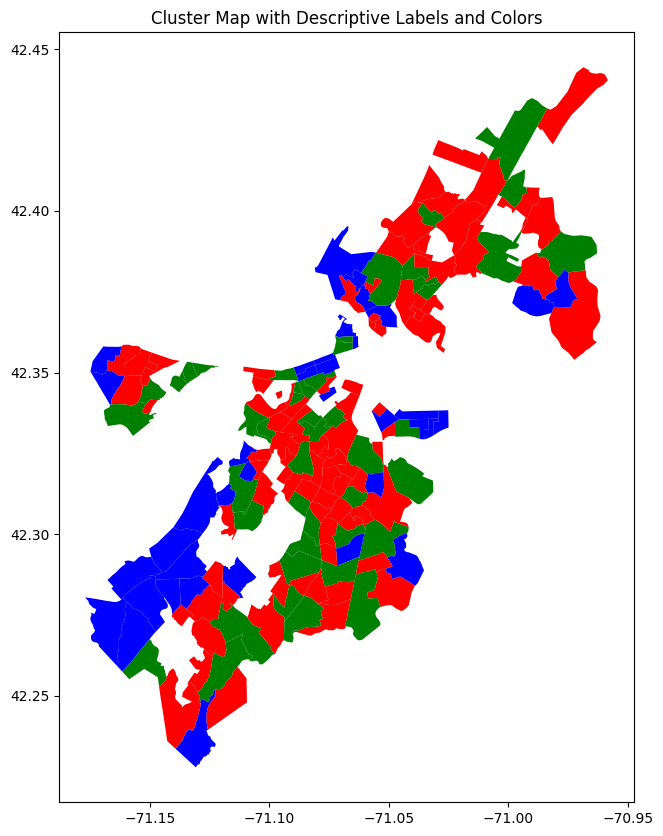

In [125]:
from sklearn.cluster import KMeans
import geopandas as gpd

scaler = StandardScaler()

scaled_data = scaler.fit_transform(merged_2013_data[['Median Household Income', 'Median Gross Rent']])

scaled_data_df = pd.DataFrame(scaled_data, columns=['Median Household Income', 'Median Gross Rent'])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data_df)
merged_2013_data['Cluster'] = kmeans.labels_

merged_2013_data = merged_2013_data[['GEO_ID', 'Median Household Income', 'Median Gross Rent', 'Cluster']]

gdf = gpd.read_file('../tl_2023_25_tract/tl_2023_25_tract.shp')
gdf.rename(columns={'GEOIDFQ': 'GEO_ID'}, inplace=True)

gdf_merged = gdf.merge(merged_2013_data, on='GEO_ID', how='inner', suffixes=('_gdf', '_data'))

# print(gdf_merged.head(100))
# print(gdf_merged.columns)  # This will show all the column names, including those with suffixes

cluster_labels = {
    0: 'High Income, High Rent',
    1: 'Moderate Income, Moderate Rent',
    2: 'Low Income, Low Rent'
}
gdf_merged['Labels'] = gdf_merged['Cluster'].map(cluster_labels)

# Color mapping
color_map = {
    'High Income, High Rent': 'red',
    'Moderate Income, Moderate Rent': 'green',
    'Low Income, Low Rent': 'blue'
}

# Map the cluster labels to colors
gdf_merged['Color'] = gdf_merged['Cluster'].map(cluster_labels).map(color_map)

# Plotting using the existing geometry in gdf_merged
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_merged.plot(color=gdf_merged['Color'], legend=True, ax=ax)
ax.set_title('Cluster Map with Descriptive Labels and Colors')
plt.show()


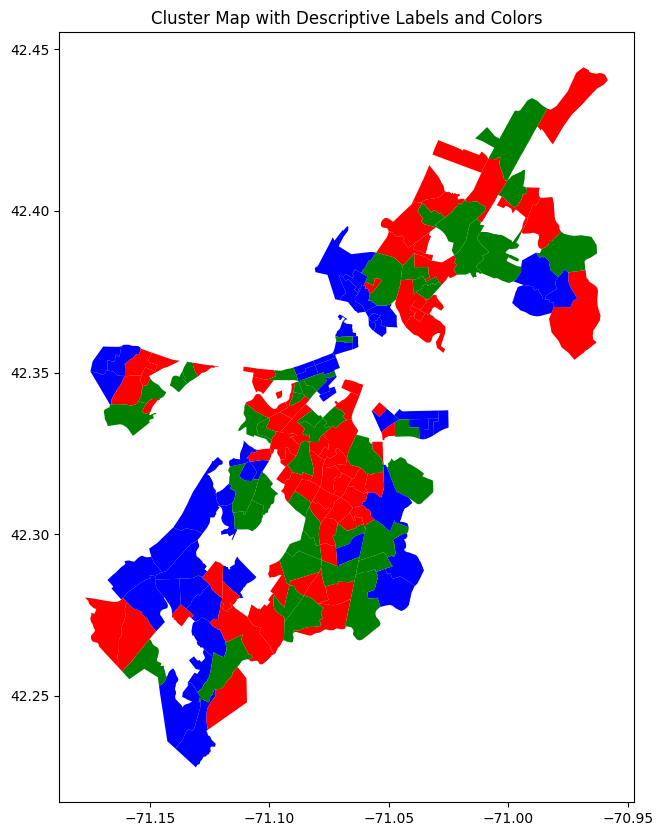

In [126]:
from sklearn.cluster import KMeans
import geopandas as gpd

scaler = StandardScaler()

scaled_data = scaler.fit_transform(merged_2016_data[['Median Household Income', 'Median Gross Rent']])

scaled_data_df = pd.DataFrame(scaled_data, columns=['Median Household Income', 'Median Gross Rent'])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data_df)
merged_2016_data['Cluster'] = kmeans.labels_

merged_2016_data = merged_2016_data[['GEO_ID', 'Median Household Income', 'Median Gross Rent', 'Cluster']]

gdf = gpd.read_file('../tl_2023_25_tract/tl_2023_25_tract.shp')
gdf.rename(columns={'GEOIDFQ': 'GEO_ID'}, inplace=True)

gdf_merged = gdf.merge(merged_2016_data, on='GEO_ID', how='inner', suffixes=('_gdf', '_data'))

cluster_labels = {
    0: 'High Income, High Rent',
    1: 'Moderate Income, Moderate Rent',
    2: 'Low Income, Low Rent'
}
gdf_merged['Labels'] = gdf_merged['Cluster'].map(cluster_labels)

# Color mapping
color_map = {
    'High Income, High Rent': 'red',
    'Moderate Income, Moderate Rent': 'green',
    'Low Income, Low Rent': 'blue'
}

# Map the cluster labels to colors
gdf_merged['Color'] = gdf_merged['Cluster'].map(cluster_labels).map(color_map)

# Plotting using the existing geometry in gdf_merged
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_merged.plot(color=gdf_merged['Color'], legend=True, ax=ax)
ax.set_title('Cluster Map with Descriptive Labels and Colors')
plt.show()


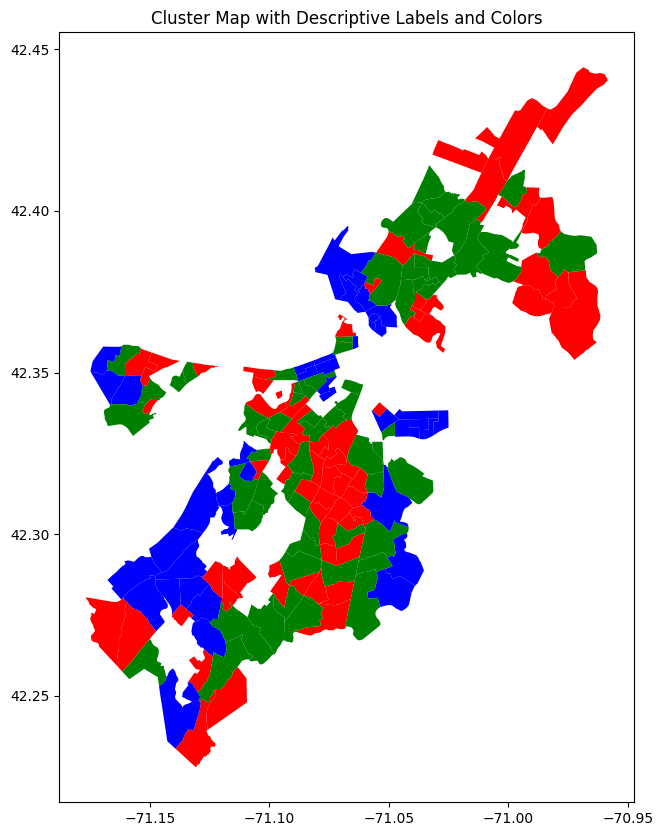

In [127]:
from sklearn.cluster import KMeans
import geopandas as gpd

scaler = StandardScaler()

scaled_data = scaler.fit_transform(merged_2019_data[['Median Household Income', 'Median Gross Rent']])

scaled_data_df = pd.DataFrame(scaled_data, columns=['Median Household Income', 'Median Gross Rent'])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data_df)
merged_2019_data['Cluster'] = kmeans.labels_

merged_2019_data = merged_2019_data[['GEO_ID', 'Median Household Income', 'Median Gross Rent', 'Cluster']]

gdf = gpd.read_file('../tl_2023_25_tract/tl_2023_25_tract.shp')
gdf.rename(columns={'GEOIDFQ': 'GEO_ID'}, inplace=True)

gdf_merged = gdf.merge(merged_2019_data, on='GEO_ID', how='inner', suffixes=('_gdf', '_data'))


cluster_labels = {
    0: 'High Income, High Rent',
    1: 'Moderate Income, Moderate Rent',
    2: 'Low Income, Low Rent'
}
gdf_merged['Labels'] = gdf_merged['Cluster'].map(cluster_labels)

# Color mapping
color_map = {
    'High Income, High Rent': 'red',
    'Moderate Income, Moderate Rent': 'green',
    'Low Income, Low Rent': 'blue'
}

# Map the cluster labels to colors
gdf_merged['Color'] = gdf_merged['Cluster'].map(cluster_labels).map(color_map)

cluster_labels = {
    0: 'High Income, High Rent',
    1: 'Moderate Income, Moderate Rent',
    2: 'Low Income, Low Rent'
}
gdf_merged['Labels'] = gdf_merged['Cluster'].map(cluster_labels)

# Color mapping
color_map = {
    'High Income, High Rent': 'red',
    'Moderate Income, Moderate Rent': 'green',
    'Low Income, Low Rent': 'blue'
}

# Map the cluster labels to colors
gdf_merged['Color'] = gdf_merged['Cluster'].map(cluster_labels).map(color_map)

# Plotting using the existing geometry in gdf_merged
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_merged.plot(color=gdf_merged['Color'], legend=True, ax=ax)
ax.set_title('Cluster Map with Descriptive Labels and Colors')
plt.show()






### Analyzing the Top 3 Census Tracts with the Largest Income to Rent Ratio Change from 2013 to 2022

Since our data has so many census tracts, it is hard to strike any general conclusions. The goal here is to take three census tracts that we know had substantial change in one area, and see what we can find out about these tracts. We can look into how modes of transportation has changed for these tracts over time and look into demographic data to identify any shifts there as well. Doing this will hopefully give us an idea of what is going on in these tracts, and perhaps generalize it to some of these other tracts experiencing similar changes and shifts.

                   GEO_ID
58   1400000US25025061000
112  1400000US25025100900
35   1400000US25025040200


/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_25406/369641648.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_25406/369641648.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2y/kltst65s5v9_rc09rl3t1z4h0000gn/T/ipykernel_25406/369641648.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

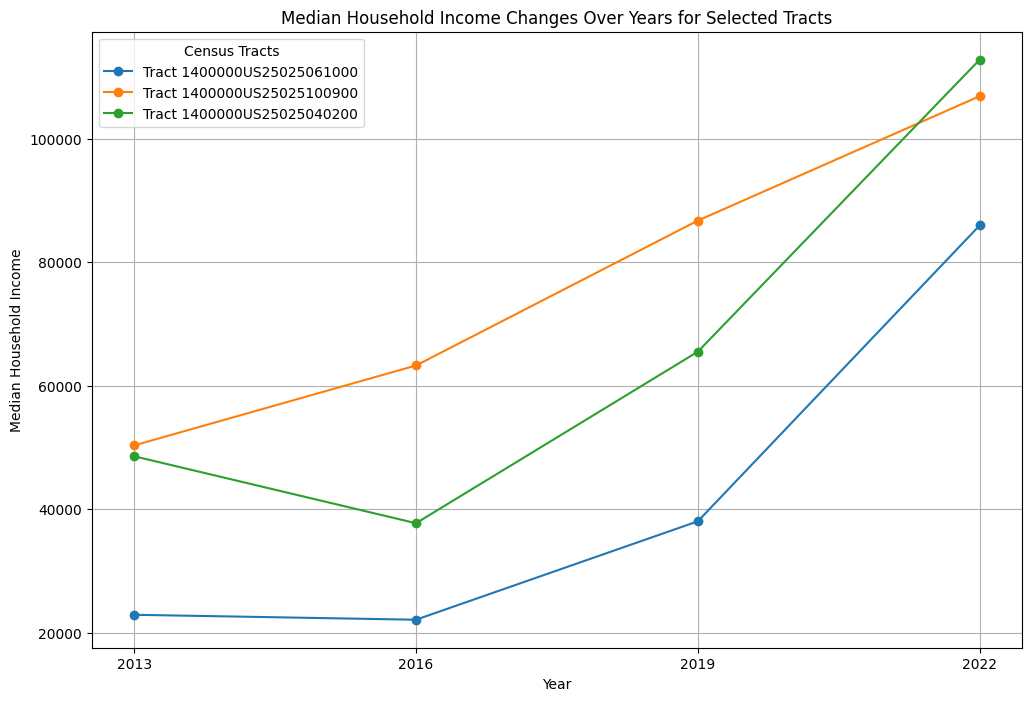

In [147]:
# Extract the top 3 tracts based on the 'Change 2013-2022' column
top_3_tracts_2013_2022 = df_heatmap.nlargest(3, 'Change 2013-2022')

# Display the top 3 tracts
print(top_3_tracts_2013_2022[['GEO_ID']])

top_three_tracts = ['1400000US25025061000', '1400000US25025100900', '1400000US25025040200']

# Years to plot
years = [2013, 2016, 2019, 2022]

cleaned_data['Year'] = 2013
cleaned_data_2016['Year'] = 2016
cleaned_data_2019['Year'] = 2019
cleaned_data_2022['Year'] = 2022

all_cleaned_data = pd.concat([cleaned_data, cleaned_data_2016, cleaned_data_2019, cleaned_data_2022])


plt.figure(figsize=(12, 8))

for geo_id in top_three_tracts:
    # Select data for the current GEO_ID
    tract_data = all_cleaned_data[all_cleaned_data['GEO_ID'] == geo_id]
    # Plotting
    plt.plot(tract_data['Year'], tract_data['Median Household Income'], marker='o', label=f'Tract {geo_id}')

plt.title('Median Household Income Changes Over Years for Selected Tracts')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.legend(title='Census Tracts')
plt.grid(True)
plt.xticks(all_cleaned_data['Year'].unique())  # Ensure all years are labeled correctly
plt.show()

Index(['GEO_ID', 'NAME_x', 'S0802_C01_001E', 'S0802_C01_001M',
       'S0802_C02_001E', 'S0802_C02_001M', 'S0802_C03_001E', 'S0802_C03_001M',
       'S0802_C04_001E', 'S0802_C04_001M',
       ...
       'S1901_C04_016E', 'S1901_C04_016M', 'Unnamed: 130', 'Year_x', 'NAME',
       'Median Household Income_y', 'Median Gross Rent', 'Annual Rent',
       'Income to Rent Ratio', 'Year_y'],
      dtype='object', length=922)
                   GEO_ID
58   1400000US25025061000
112  1400000US25025100900
35   1400000US25025040200


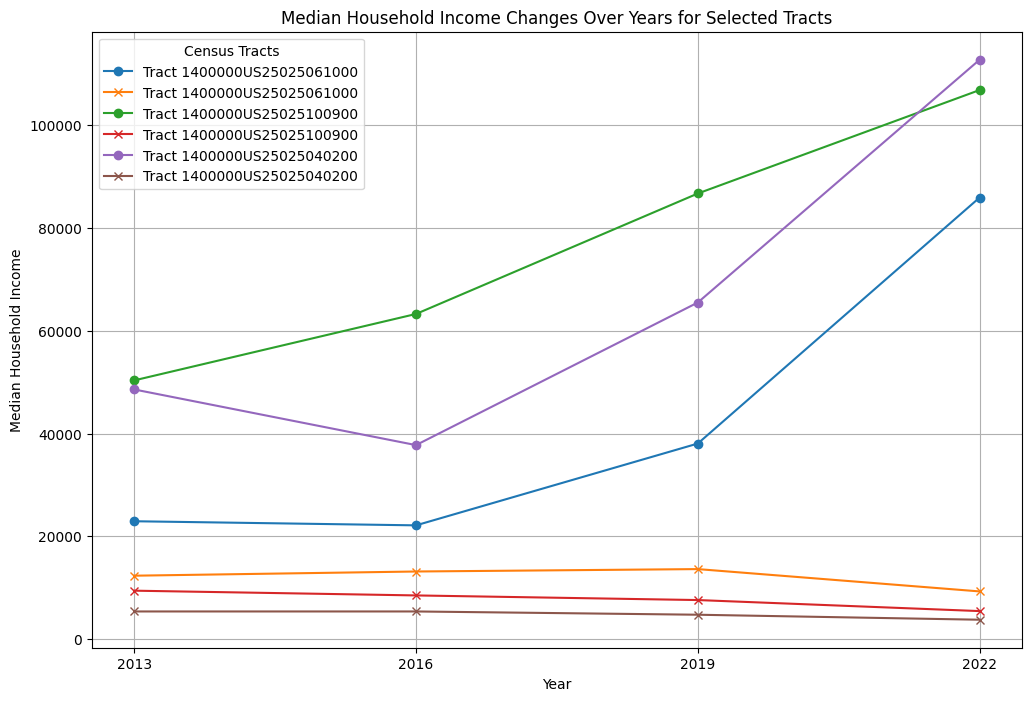

In [154]:
# Merging the datasets on 'GEO_ID'
final_data_2013 = pd.merge(cleaned_data, combined_data_2013, on='GEO_ID', how='inner')
final_data_2016 = pd.merge(cleaned_data_2016, combined_data_2016, on='GEO_ID', how='inner')
final_data_2019 = pd.merge(cleaned_data_2019, combined_data_2019, on='GEO_ID', how='inner')
final_data_2022 = pd.merge(cleaned_data_2022, combined_data_2022, on='GEO_ID', how='inner')

all_final_data_with_rent = pd.concat([final_data_2013, final_data_2016, final_data_2019, final_data_2022])

print(all_final_data_with_rent.columns)

# Extract the top 3 tracts based on the 'Change 2013-2022' column
top_3_tracts_2013_2022 = df_heatmap.nlargest(3, 'Change 2013-2022')

# Display the top 3 tracts
print(top_3_tracts_2013_2022[['GEO_ID']])

top_three_tracts = ['1400000US25025061000', '1400000US25025100900', '1400000US25025040200']

plt.figure(figsize=(12, 8))

for geo_id in top_three_tracts:
    # Select data for the current GEO_ID
    tract_data = all_final_data_with_rent[all_final_data_with_rent['GEO_ID'] == geo_id]
    # Plotting
    plt.plot(tract_data['Year_y'], tract_data['Median Household Income_y'], marker='o', label=f'Tract {geo_id}')
    plt.plot(tract_data['Year_y'], tract_data['Annual Rent'], marker='x', label=f'Tract {geo_id}')


plt.title('Median Household Income Changes Over Years for Selected Tracts')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.legend(title='Census Tracts')
plt.grid(True)
plt.xticks(all_cleaned_data['Year'].unique())  # Ensure all years are labeled correctly
plt.show()

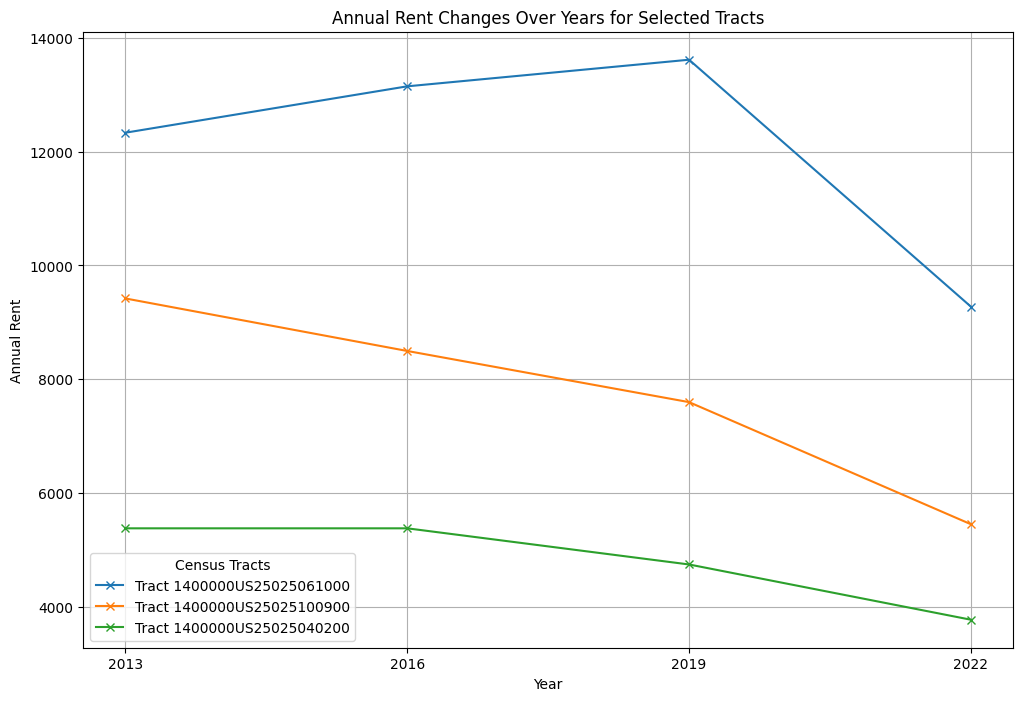

In [155]:
plt.figure(figsize=(12, 8))

for geo_id in top_three_tracts:
    # Select data for the current GEO_ID
    tract_data = all_final_data_with_rent[all_final_data_with_rent['GEO_ID'] == geo_id]
    # Plotting
    plt.plot(tract_data['Year_y'], tract_data['Annual Rent'], marker='x', label=f'Tract {geo_id}')


plt.title('Annual Rent Changes Over Years for Selected Tracts')
plt.xlabel('Year')
plt.ylabel('Annual Rent')
plt.legend(title='Census Tracts')
plt.grid(True)
plt.xticks(all_cleaned_data['Year'].unique())  # Ensure all years are labeled correctly
plt.show()

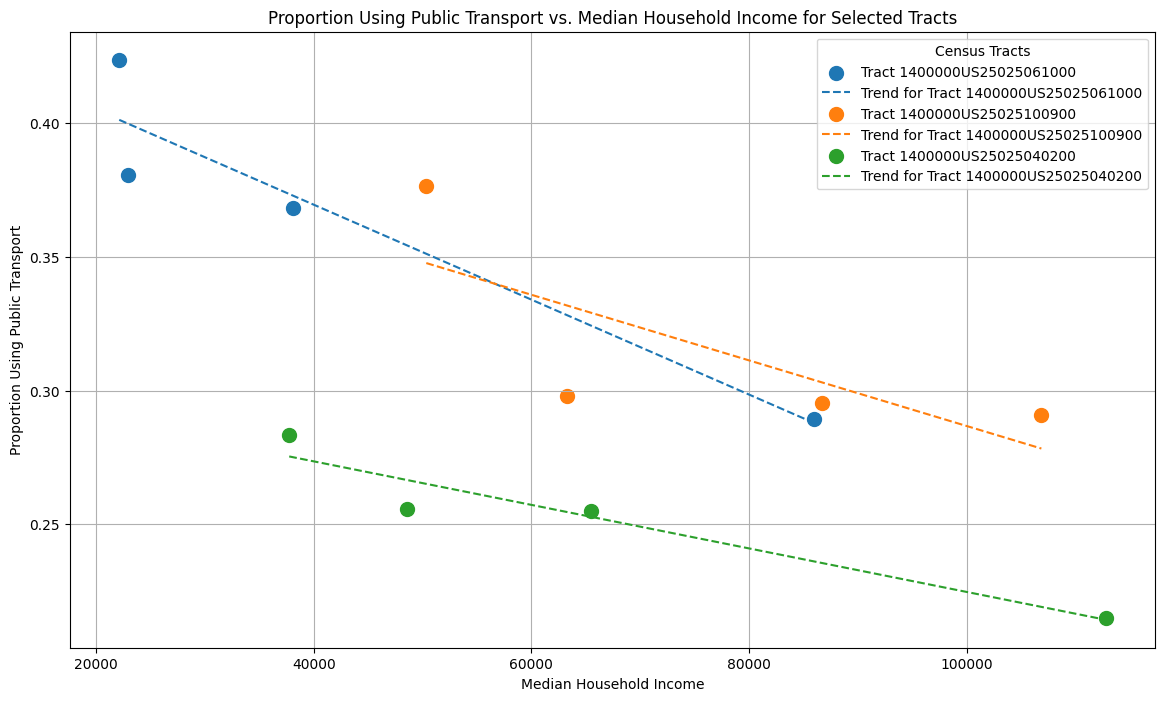

In [138]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(14, 8))

# Create axes object
ax = plt.gca()  # Get current axes

# Loop through each tract and plot the data
for geo_id in top_three_tracts:
    # Select data for the current GEO_ID
    tract_data = all_cleaned_data[all_cleaned_data['GEO_ID'] == geo_id]

    # Plotting Public Transport Ratio against Median Household Income
    ax.scatter(tract_data['Median Household Income'], tract_data['Public_Transport_Ratio'], label=f'Tract {geo_id}', s=100)  # s is size of points

    # Optional: Fit and plot a trend line
    if not tract_data['Median Household Income'].isnull().any() and not tract_data['Public_Transport_Ratio'].isnull().any():
        # Fit a linear trend line
        coefficients = np.polyfit(tract_data['Median Household Income'], tract_data['Public_Transport_Ratio'], 1)
        polynomial = np.poly1d(coefficients)
        x_vals = np.linspace(tract_data['Median Household Income'].min(), tract_data['Median Household Income'].max(), 100)
        y_vals = polynomial(x_vals)
        ax.plot(x_vals, y_vals, linestyle='--', label=f'Trend for Tract {geo_id}')

# Adding plot details
ax.set_title('Proportion Using Public Transport vs. Median Household Income for Selected Tracts')
ax.set_xlabel('Median Household Income')
ax.set_ylabel('Proportion Using Public Transport')
ax.legend(title='Census Tracts')
ax.grid(True)

plt.show()


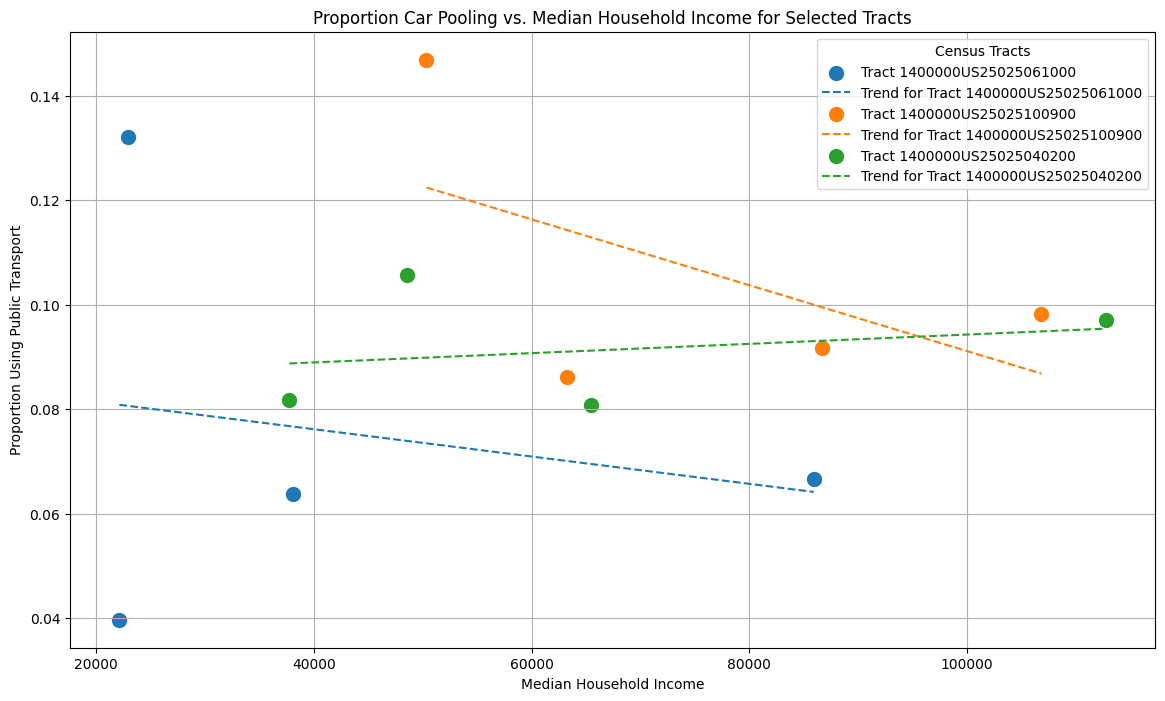

In [139]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(14, 8))

# Create axes object
ax = plt.gca()  # Get current axes

# Loop through each tract and plot the data
for geo_id in top_three_tracts:
    # Select data for the current GEO_ID
    tract_data = all_cleaned_data[all_cleaned_data['GEO_ID'] == geo_id]

    # Plotting Public Transport Ratio against Median Household Income
    ax.scatter(tract_data['Median Household Income'], tract_data['Carpool_Ratio'], label=f'Tract {geo_id}', s=100)  # s is size of points

    # Optional: Fit and plot a trend line
    if not tract_data['Median Household Income'].isnull().any() and not tract_data['Carpool_Ratio'].isnull().any():
        # Fit a linear trend line
        coefficients = np.polyfit(tract_data['Median Household Income'], tract_data['Carpool_Ratio'], 1)
        polynomial = np.poly1d(coefficients)
        x_vals = np.linspace(tract_data['Median Household Income'].min(), tract_data['Median Household Income'].max(), 100)
        y_vals = polynomial(x_vals)
        ax.plot(x_vals, y_vals, linestyle='--', label=f'Trend for Tract {geo_id}')

# Adding plot details
ax.set_title('Proportion Car Pooling vs. Median Household Income for Selected Tracts')
ax.set_xlabel('Median Household Income')
ax.set_ylabel('Proportion Car Pooling')
ax.legend(title='Census Tracts')
ax.grid(True)

plt.show()

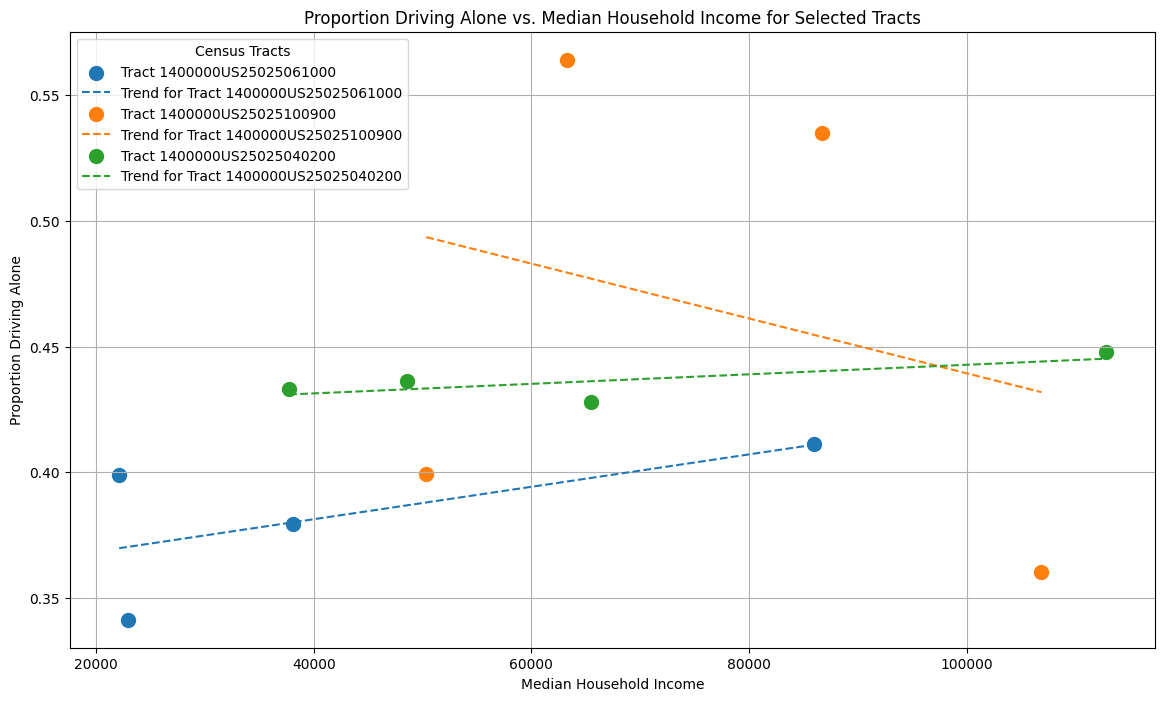

In [176]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(14, 8))

# Create axes object
ax = plt.gca()  # Get current axes

# Loop through each tract and plot the data
for geo_id in top_three_tracts:
    # Select data for the current GEO_ID
    tract_data = all_cleaned_data[all_cleaned_data['GEO_ID'] == geo_id]

    # Plotting Public Transport Ratio against Median Household Income
    ax.scatter(tract_data['Median Household Income'], tract_data['Drive_Alone_Ratio'], label=f'Tract {geo_id}', s=100)  # s is size of points

    # Optional: Fit and plot a trend line
    if not tract_data['Median Household Income'].isnull().any() and not tract_data['Drive_Alone_Ratio'].isnull().any():
        # Fit a linear trend line
        coefficients = np.polyfit(tract_data['Median Household Income'], tract_data['Drive_Alone_Ratio'], 1)
        polynomial = np.poly1d(coefficients)
        x_vals = np.linspace(tract_data['Median Household Income'].min(), tract_data['Median Household Income'].max(), 100)
        y_vals = polynomial(x_vals)
        ax.plot(x_vals, y_vals, linestyle='--', label=f'Trend for Tract {geo_id}')

# Adding plot details
ax.set_title('Proportion Driving Alone vs. Median Household Income for Selected Tracts')
ax.set_xlabel('Median Household Income')
ax.set_ylabel('Proportion Driving Alone')
ax.legend(title='Census Tracts')
ax.grid(True)

plt.show()

In [241]:
demographic_2013_path = '../demographic_data/demographic_2013.csv'
demographic_2016_path = '../demographic_data/demographic_2016.csv'
demographic_2019_path = '../demographic_data/demographic_2019.csv'
demographic_2022_path = '../demographic_data/demographic_2022.csv'

demographic_data_2013 = pd.read_csv(demographic_2013_path)
demographic_data_2016 = pd.read_csv(demographic_2016_path)
demographic_data_2019 = pd.read_csv(demographic_2019_path)
demographic_data_2022 = pd.read_csv(demographic_2022_path)

demographic_data_2013 = demographic_data_2013.drop(demographic_data_2013.index[1])
demographic_data_2016 = demographic_data_2016.drop(demographic_data_2016.index[1])
demographic_data_2019 = demographic_data_2019.drop(demographic_data_2019.index[1])
demographic_data_2022 = demographic_data_2022.drop(demographic_data_2022.index[1])

demographic_data_2013['Year'] = 2013
demographic_data_2016['Year'] = 2016
demographic_data_2019['Year'] = 2019
demographic_data_2022['Year'] = 2022

race_mapping = {
    'S0601_C01_014E': 'White',
    'S0601_C01_015E': 'African American',
    # 'S0601_C01_016E': 'American Indian and Alaska Native',
    'S0601_C01_017E': 'Asian',
    # 'S0601_C01_018E': 'Native Hawaiian and Other Pacific Islander',
    'S0601_C01_021E': 'Hispanic'
}

demographic_data_2013.rename(columns=race_mapping, inplace=True)
demographic_data_2016.rename(columns=race_mapping, inplace=True)
demographic_data_2019.rename(columns=race_mapping, inplace=True)
demographic_data_2022.rename(columns=race_mapping, inplace=True)

# combined_data_2013.drop(columns=['NAME'], inplace=True)
# combined_data_2016.drop(columns=['NAME'], inplace=True)
# combined_data_2019.drop(columns=['NAME'], inplace=True)
# combined_data_2022.drop(columns=['NAME'], inplace=True)

# # Merge demographic data with existing data
# combined_data_2013 = pd.merge(combined_data_2013, demographic_data_2013, on='GEO_ID', how='inner', suffixes=('_combined', '_demographic'))
# combined_data_2016 = pd.merge(combined_data_2016, demographic_data_2016, on='GEO_ID', how='inner', suffixes=('_combined', '_demographic'))
# combined_data_2019 = pd.merge(combined_data_2019, demographic_data_2019, on='GEO_ID', how='inner', suffixes=('_combined', '_demographic'))
# combined_data_2022 = pd.merge(combined_data_2022, demographic_data_2022, on='GEO_ID', how='inner', suffixes=('_combined', '_demographic'))


combined_demographic_data = pd.concat([combined_data_2013, combined_data_2016, combined_data_2019, combined_data_2022], ignore_index=True)




# List of census tracts
top_three_tracts = ['1400000US25025061000', '1400000US25025100900', '1400000US25025040200']

# List of years
years = [2013, 2016, 2019, 2022]

# Iterate over each year and each census tract
for year in years:
    for tract in top_three_tracts:
        # Filter the combined_demographic_data DataFrame
        filtered_data = combined_demographic_data[(combined_demographic_data['GEO_ID'] == tract) & 
                                                  (combined_demographic_data['Year'] == year)]

        # Extract the value of the 'White' demographic
        white_value = filtered_data['White'].iloc[0]  # Assuming 'White' is a column in combined_demographic_data

        # Print the result
        print(f"Value of 'White' demographic for GEO_ID {tract} in {year}: {white_value}")

tract_1_white = [60.7, 57.6, 64.2, 63.1]
tract_2_white = [32.8, 26.6, 26.5, 25.2]
tract_3_white = [57.2, 46.8, 66.5, 55.5]

tract_1_black = [12.4, 20.9, 22.5, 16.5]
tract_2_black = [46.6, 60.0, 53.1, 56.2]
tract_3_black = [15.6, 23.1, 15.4, 23.2]

tract_1_asian = [6.6, 5.1, 3.2, 13.0]
tract_2_asian = [16.2, 5.8, 8.6, 5.7]
tract_3_asian = [5.2, 6.1, 8.6, 3.5]

tract_1_hispanic = [24.3, 31.9, 28.7, 17.4]
tract_2_hispanic = [12.0, 8.2, 10.9, 10.4]
tract_3_hispanic = [24.6, 30.6, 21.9, 24.2]


Value of 'White' demographic for GEO_ID 1400000US25025061000 in 2013: 60.7
Value of 'White' demographic for GEO_ID 1400000US25025100900 in 2013: 32.8
Value of 'White' demographic for GEO_ID 1400000US25025040200 in 2013: 57.2
Value of 'White' demographic for GEO_ID 1400000US25025061000 in 2016: 57.6
Value of 'White' demographic for GEO_ID 1400000US25025100900 in 2016: 26.6
Value of 'White' demographic for GEO_ID 1400000US25025040200 in 2016: 46.8
Value of 'White' demographic for GEO_ID 1400000US25025061000 in 2019: 64.2
Value of 'White' demographic for GEO_ID 1400000US25025100900 in 2019: 26.5
Value of 'White' demographic for GEO_ID 1400000US25025040200 in 2019: 66.5
Value of 'White' demographic for GEO_ID 1400000US25025061000 in 2022: 63.1
Value of 'White' demographic for GEO_ID 1400000US25025100900 in 2022: 25.2
Value of 'White' demographic for GEO_ID 1400000US25025040200 in 2022: 55.5


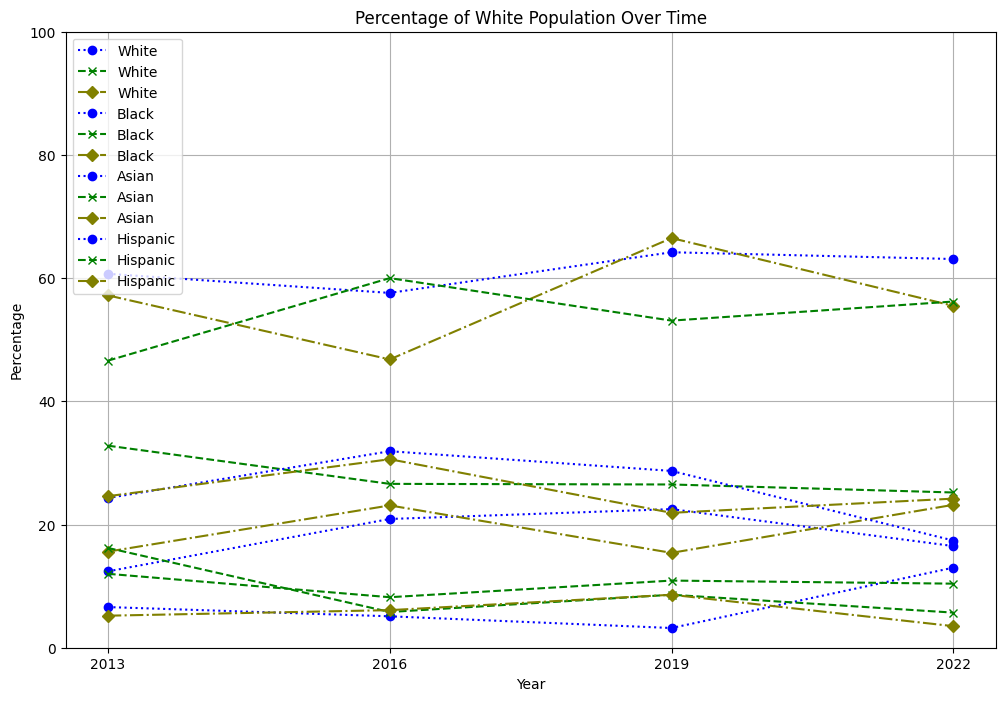

In [250]:
import matplotlib.pyplot as plt
import pandas as pd

# # Assuming 'combined_demographic_data' contains the combined data as described previously
# top_three_tracts = ['1400000US25025061000', '1400000US25025100900', '1400000US25025040200']

# # Filter data for the top three tracts
# filtered_data = combined_demographic_data[combined_demographic_data['GEO_ID'].isin(top_three_tracts)]

# Create a plot
plt.figure(figsize=(12, 8))

# # Colors and markers for clarity in the plot
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# markers = ['o', '^', 's', 'P', '*', 'x', 'D']

# # Plotting each demographic for each tract
# for i, tract in enumerate(top_three_tracts):
#     tract_data = filtered_data[filtered_data['GEO_ID'] == tract]
#     for j, (code, demographic) in enumerate(race_mapping.items()):
#         plt.plot(tract_data['Year'], tract_data[demographic], label=f'{demographic} in Tract {i+1}',
#                     color=colors[j % len(colors)], marker=markers[j % len(markers)])  # Adjust size as needed
# # Example data
years = [2013, 2016, 2019, 2022]

# Plotting the 'White' demographic
plt.plot(years, tract_1_white, label='White', color='blue', marker='o', linestyle=':')
plt.plot(years, tract_2_white, label='White', color='green', marker='x', linestyle='--')
plt.plot(years, tract_3_white, label='White', color='olive', marker='D', linestyle='-.')

plt.plot(years, tract_1_black, label='Black', color='blue', marker='o', linestyle=':')
plt.plot(years, tract_2_black, label='Black', color='green', marker='x', linestyle='--')
plt.plot(years, tract_3_black, label='Black', color='olive', marker='D', linestyle='-.')

plt.plot(years, tract_1_asian, label='Asian', color='blue', marker='o', linestyle=':')
plt.plot(years, tract_2_asian, label='Asian', color='green', marker='x', linestyle='--')
plt.plot(years, tract_3_asian, label='Asian', color='olive', marker='D', linestyle='-.')

plt.plot(years, tract_1_hispanic, label='Hispanic', color='blue', marker='o', linestyle=':')
plt.plot(years, tract_2_hispanic, label='Hispanic', color='green', marker='x', linestyle='--')
plt.plot(years, tract_3_hispanic, label='Hispanic', color='olive', marker='D', linestyle='-.')

# Set y-axis limits to 0 and 100
plt.ylim(0, 100)

# Adding plot title and labels
plt.title('Percentage of White Population Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(years)

# Show grid
plt.grid(True)

# Show legend
plt.legend()

# Show plot
plt.show()



# # Adding plot title and labels
# plt.title('Demographic Trends Over Time by Census Tract')
# plt.xlabel('Year')
# plt.ylabel('Percentage of Total Population (%)')
# plt.xticks(tract_data['Year'].unique())  # Set x-ticks to be the years
# plt.legend()
# plt.grid(True)
# plt.show()
